In [115]:
from pathlib import Path
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import torch

sns.set_style("whitegrid")
plt.rcParams["figure.dpi"] = 300

results_path = Path.cwd().resolve().parent / "benchmarks/results/"
mcts_path = Path.cwd().resolve().parent / "tgnnexplainer/xgraph/saved_mcts_results"

os.makedirs("plots", exist_ok=True)

explainers = [
    "xtg-old",
    "attn",
    "pg",
    "pbone",
    "xtg",
    "xtg-dot"
    ""
]

base_explainers = [
    "xtg-old",
    "attn",
    "pg",
    "pbone",
]

nav_explainers = [
    "xtg-old",
    "xtg",
    "xtg-dot"
]

labels = {
    'xtg-old': 'THEIRS',
    'attn': 'ATTN',
    'pg': 'PG',
    'pbone': 'PBONE',
    'xtg': 'OURS',
    'xtg-dot': 'OURS (DOT)'
}
dataset_to_index = {
    "simulate_v1": "Synthetic V1",
    "simulate_v2": "Synthetic V2",
    "wikipedia": "Wikipedia",
    "reddit": "Reddit",
}

In [116]:
## Their data
df_tgat_theirs = {
    ("Wikipedia", "Best FID"): {
        "ATTN": 0.891,
        "PBONE": 0.027,
        "PG": 1.354,
        "TGNN-X": 1.836,
    },
    ("Wikipedia", "AUFSC"): {
        "ATTN": 0.564,
        "PBONE": -2.227,
        "PG": 0.564,
        "TGNN-X": 1.477,
    },
    ("Reddit", "Best FID"): {
        "ATTN": 0.658,
        "PBONE": 0.167,
        "PG": 0.804,
        "TGNN-X": 1.518,
    },
    ("Reddit", "AUFSC"): {
        "ATTN": -0.654,
        "PBONE": -2.492,
        "PG": -0.369,
        "TGNN-X": 1.076,
    },
    ("Simulate V1", "Best FID"): {
        "ATTN": 0.555,
        "PBONE": 0.044,
        "PG": 0.555,
        "TGNN-X": 0.78,
    },
    ("Simulate V1", "AUFSC"): {
        "ATTN": -0.081,
        "PBONE": -2.882,
        "PG": 0.39,
        "TGNN-X": 0.666,
    },
    ("Simulate V2", "Best FID"): {
        "ATTN": 0.605,
        "PBONE": 0.096,
        "PG": 1.329,
        "TGNN-X": 1.63,
    },
    ("Simulate V2", "AUFSC"): {
        "ATTN": 0.291,
        "PBONE": -4.771,
        "PG": -0.926,
        "TGNN-X": 1.331,
    },
}

df_tgn_theirs = {
    ("Wikipedia", "Best FID"): {
        "ATTN": 0.479,
        "PBONE": 0.296,
        "PG": 0.464,
        "TGNN-X": 0.866,
    },
    ("Wikipedia", "AUFSC"): {
        "ATTN": 0.231,
        "PBONE": -0.601,
        "PG": -0.231,
        "TGNN-X": 0.59,
    },
    ("Reddit", "Best FID"): {
        "ATTN": 0.575,
        "PBONE": 0.34,
        "PG": 0.679,
        "TGNN-X": 1.362,
    },
    ("Reddit", "AUFSC"): {"ATTN": 0.289, "PBONE": -0.256, "PG": 0.02, "TGNN-X": 1.113},
    ("Simulate V1", "Best FID"): {
        "ATTN": 2.178,
        "PBONE": 0.001,
        "PG": 2.006,
        "TGNN-X": 2.708,
    },
    ("Simulate V1", "AUFSC"): {
        "ATTN": 1.624,
        "PBONE": -3.311,
        "PG": 0.626,
        "TGNN-X": 2.281,
    },
    ("Simulate V2", "Best FID"): {
        "ATTN": 0.988,
        "PBONE": 0.32,
        "PG": 1.012,
        "TGNN-X": 4.356,
    },
    ("Simulate V2", "AUFSC"): {
        "ATTN": -1.338,
        "PBONE": -5.413,
        "PG": -1.338,
        "TGNN-X": 3.224,
    },
}

df_tgat_theirs = pd.DataFrame.from_dict(df_tgat_theirs, orient="columns")
df_tgn_theirs = pd.DataFrame.from_dict(df_tgn_theirs, orient="columns")
# df_tgat_theirs

In [117]:

def plot_aufsc(model_name, dataset, files, keys, suffix=""):
    tabs = {
        k: pd.read_csv(v).groupby("sparsity").mean()
        for k, v in files.items()
    }

    best_fids = {
        k: tab["fid_inv_best"].max() for k, tab in tabs.items()
    }
    aufsc = {
        k: np.trapz(tab["fid_inv_best"], tab.index)
        for k, tab in tabs.items()
    }

    for k in keys:
        tab = tabs[k]
        print(
            f"{k}\t FID: {tab['fid_inv_best'].mean()} \t AUC: {np.trapz(tab['fid_inv_best'], tab.index)}"
        )
        plt.plot(tab.index, tab["fid_inv_best"], label=labels[k])
    plt.legend()
    plt.tight_layout()
    plt.savefig(f"plots/th20/{model_name}_{dataset}{suffix}.png")
    return best_fids, aufsc

## TGAT
### Wikipedia

xtg-old	 FID: 0.9927514385165909 	 AUC: 1.1354159581316634
attn	 FID: 0.4633937401310318 	 AUC: 0.5135449832312763
pg	 FID: -0.43719394557967417 	 AUC: -0.37464903415529993
pbone	 FID: 0.8280495267829725 	 AUC: 0.8691429948334582


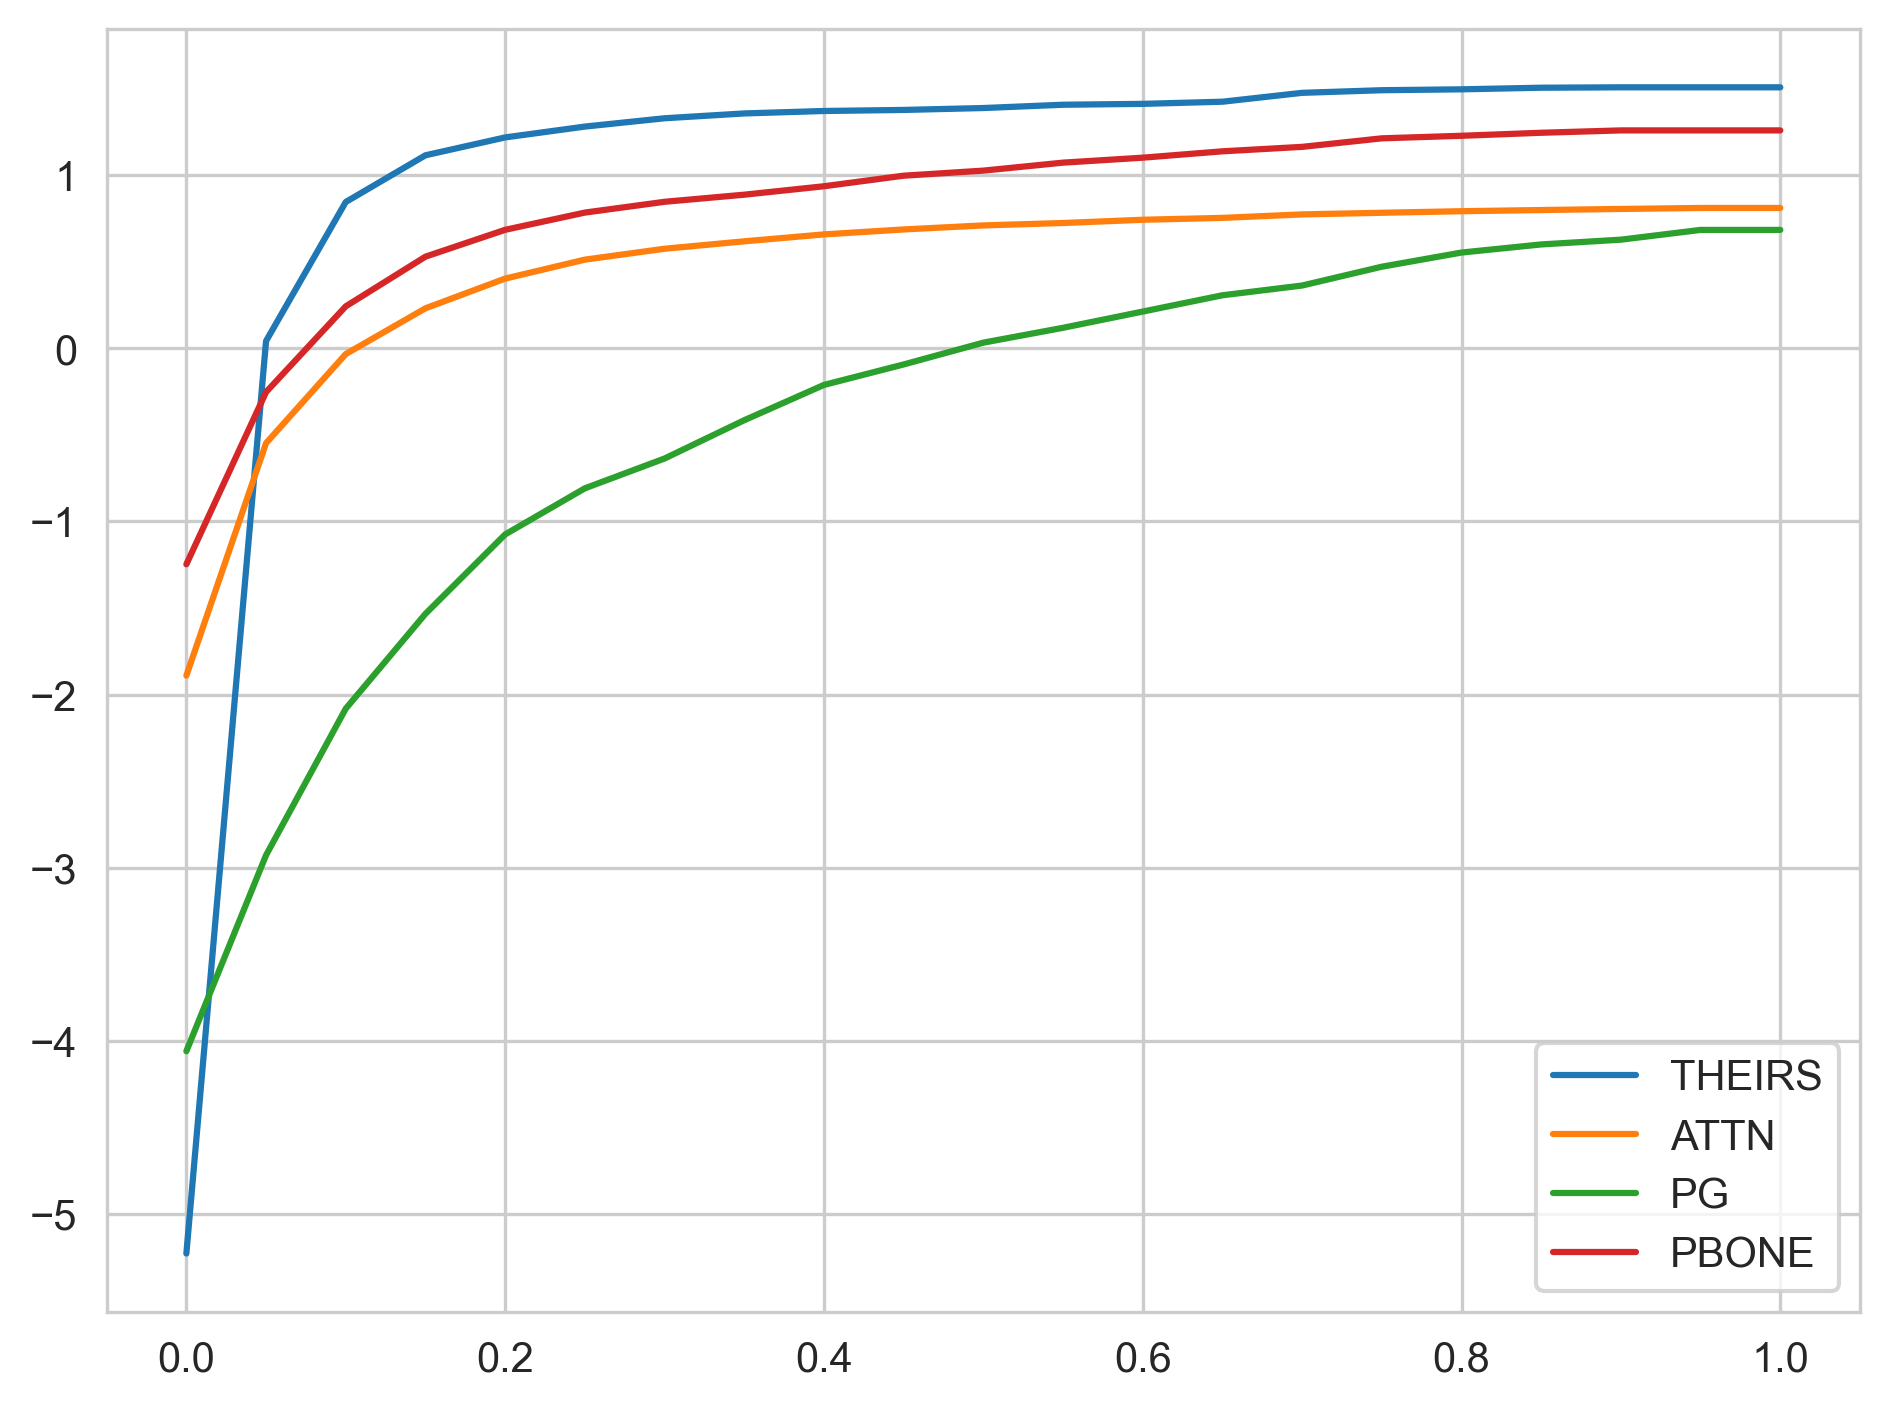

In [118]:
tgat_wikipedia_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_wikipedia_subgraphx_tg_110314_to_155151_eval_pg_true_pg_positive_th20.csv",
            "tgat_wikipedia_attn_explainer_tg_110314_to_155614_eval_th20.csv",
            "tgat_wikipedia_pg_explainer_tg_110314_to_155614_eval_th20.csv",
            "tgat_wikipedia_pbone_explainer_tg_110314_to_155614_eval_th20.csv",
            "tgat_wikipedia_subgraphx_tg_110314_to_155614_eval_mlp_true_pg_positive_th20.csv",
            "tgat_wikipedia_subgraphx_tg_110314_to_155151_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgat_wikipedia_best_fids, tgat_wikipedia_aufsc = plot_aufsc("tgat", "wikipedia", tgat_wikipedia_files, base_explainers)

xtg-old	 FID: 0.9927514385165909 	 AUC: 1.1354159581316634
xtg	 FID: 0.7718711843846278 	 AUC: 0.913682348204963
xtg-dot	 FID: 0.4595208847154642 	 AUC: 0.5821898614200763


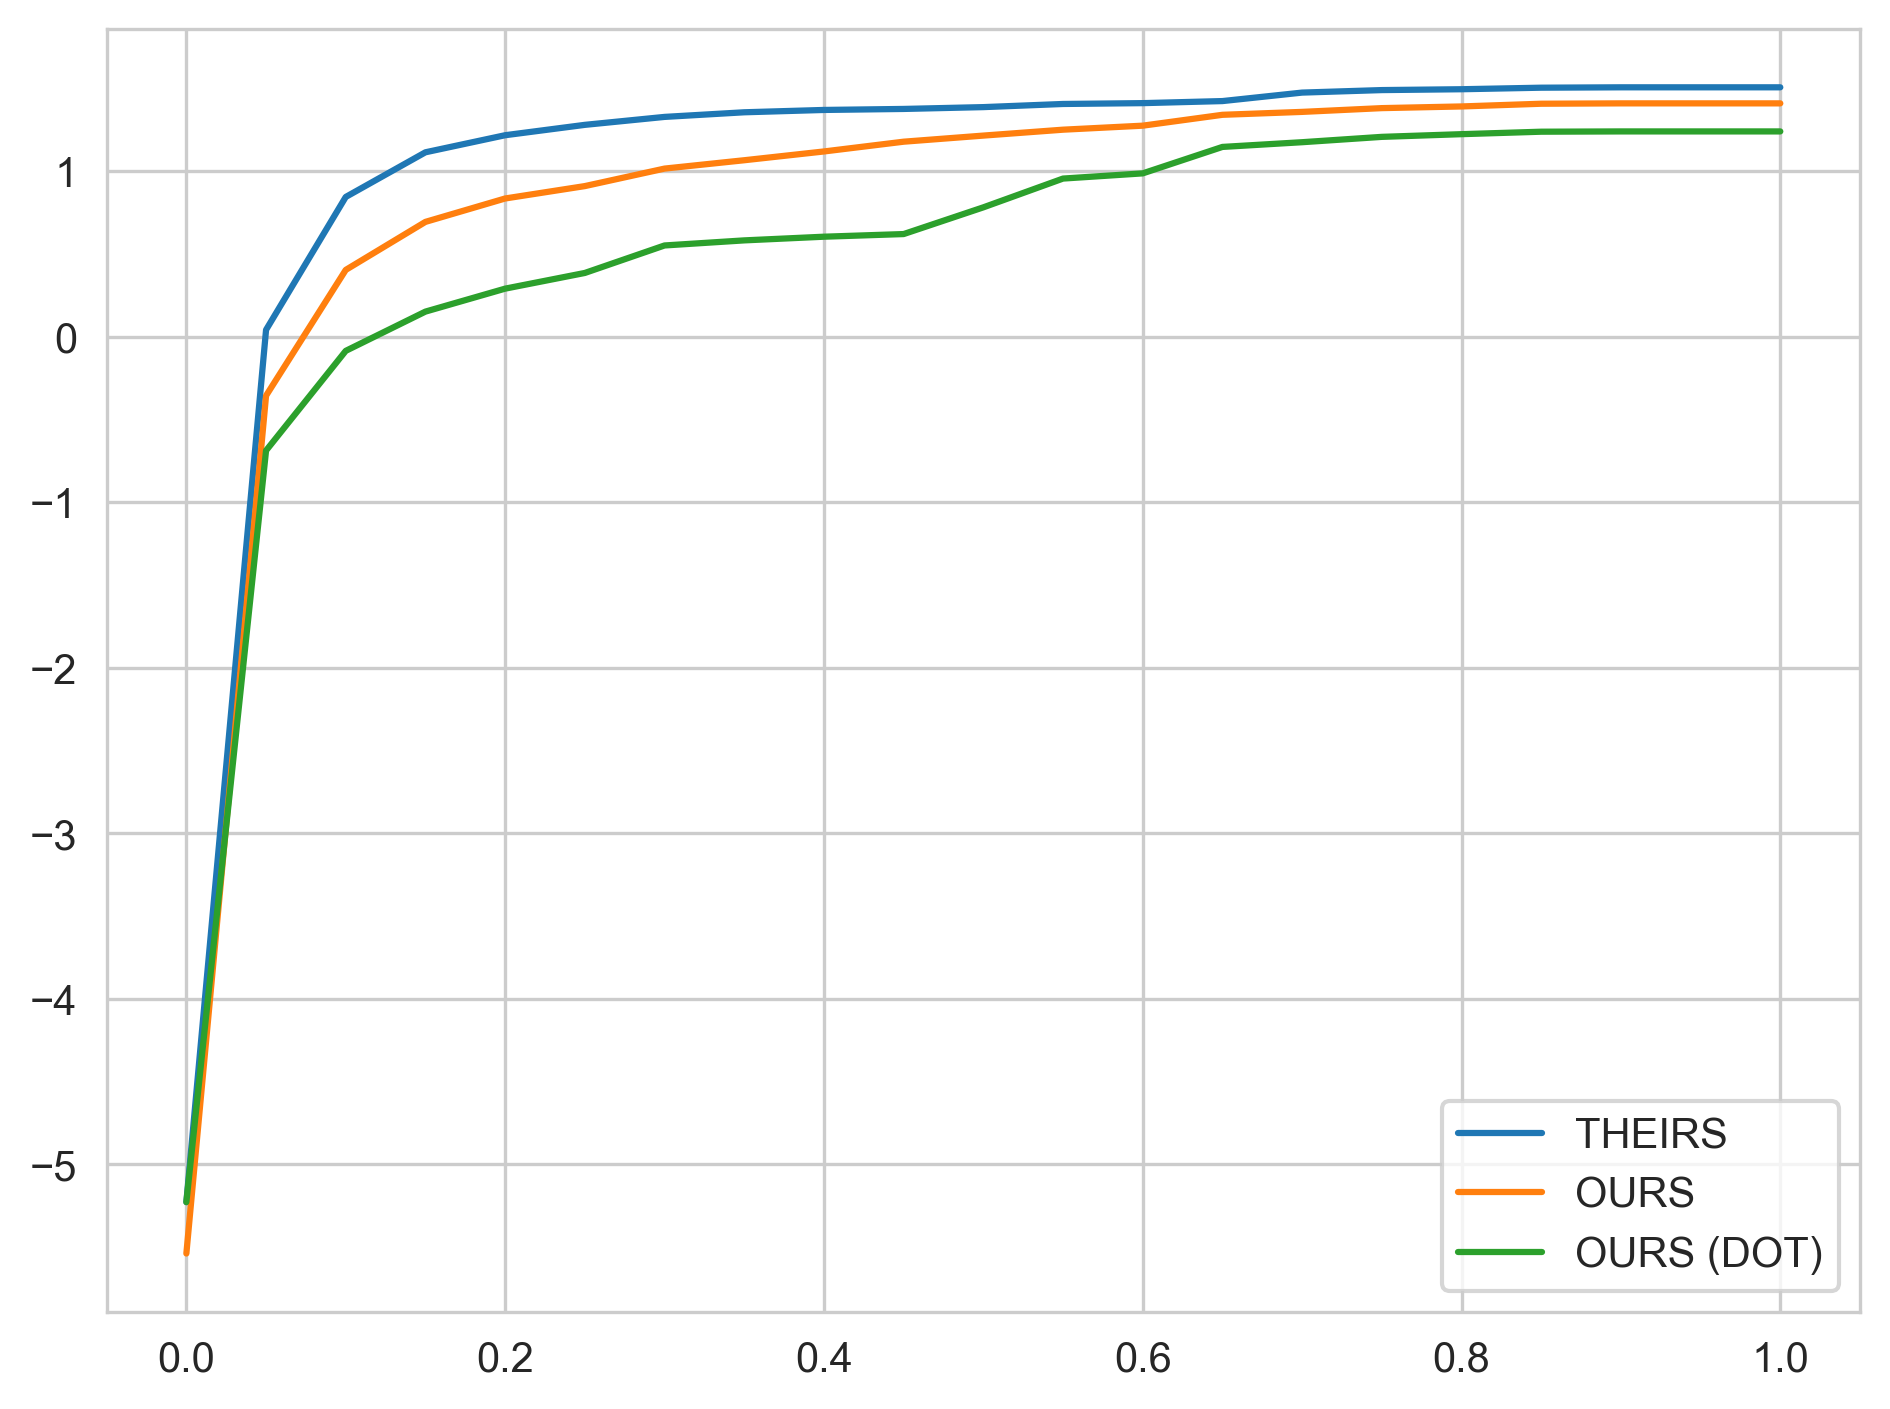

In [119]:
tgat_wikipedia_navs_best_fids, tgat_wikipedia_navs_aufsc = plot_aufsc(
    "tgat", "wikipedia", tgat_wikipedia_files, nav_explainers, "_navs")

## Reddit

xtg-old	 FID: 0.2705090011833679 	 AUC: 0.4432614514064044
attn	 FID: -1.0153672500146287 	 AUC: -0.9362572968028485
pg	 FID: -0.9125230106314026 	 AUC: -0.8289851863332094
pbone	 FID: 0.7490485460424708 	 AUC: 0.8172783054485916


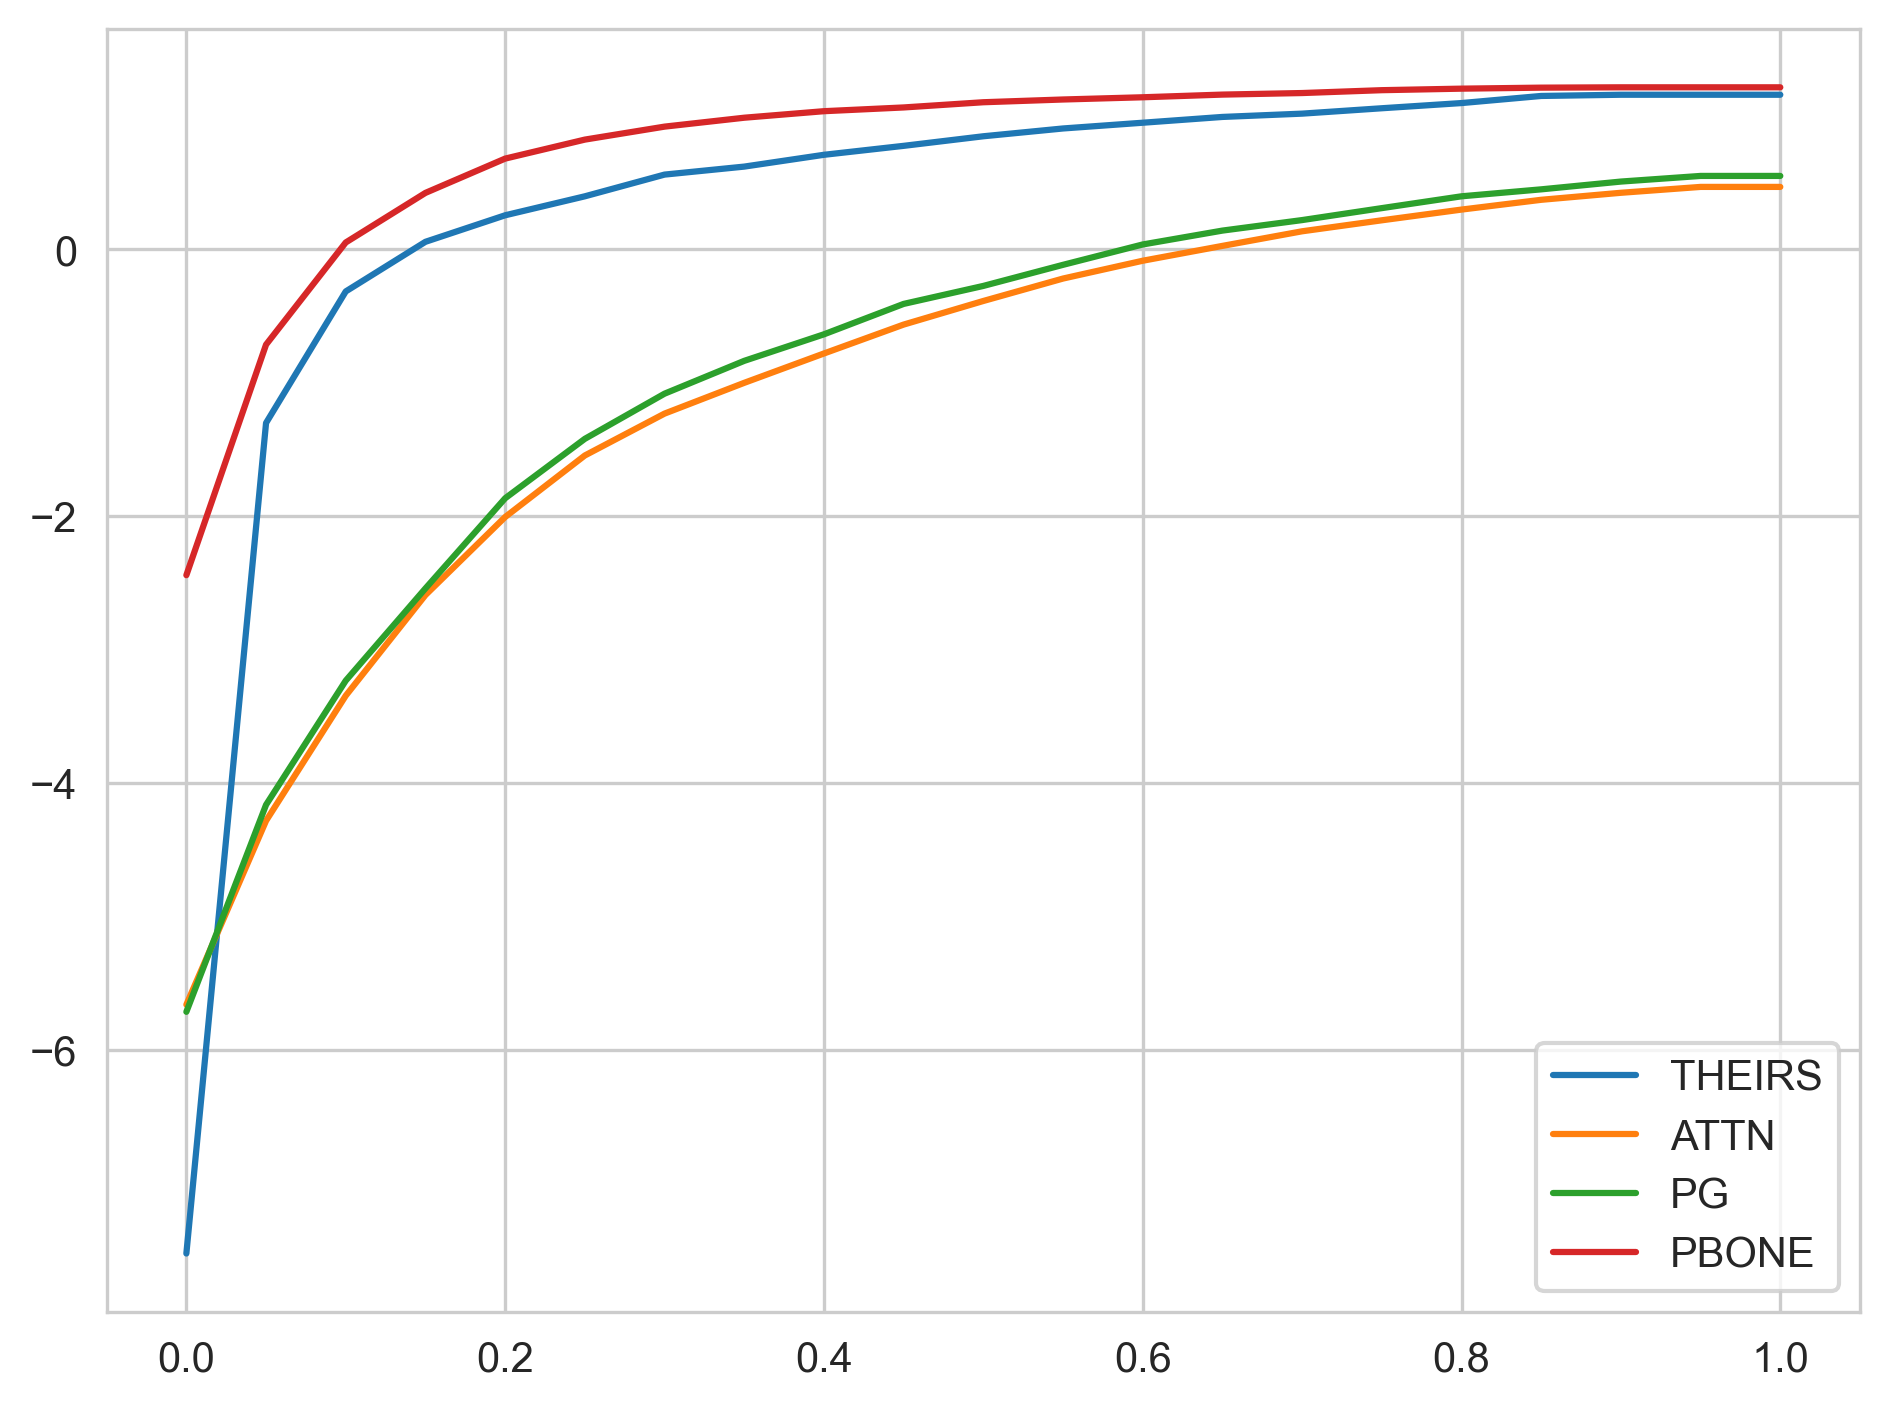

In [120]:
tgat_reddit_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_reddit_subgraphx_tg_470920_to_663534_eval_pg_true_pg_positive_th20.csv",
            "tgat_reddit_attn_explainer_tg_470920_to_665351_eval_th20.csv",
            "tgat_reddit_pg_explainer_tg_470920_to_665351_eval_th20.csv",
            "tgat_reddit_pbone_explainer_tg_470920_to_665351_eval_th20.csv",
            "tgat_reddit_subgraphx_tg_470920_to_665351_eval_mlp_true_pg_positive_th20.csv",
            "tgat_reddit_subgraphx_tg_470920_to_663534_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgat_reddit_best_fids, tgat_reddit_aufsc = plot_aufsc("tgat", "reddit", tgat_reddit_files, base_explainers)

xtg-old	 FID: 0.2705090011833679 	 AUC: 0.4432614514064044
xtg	 FID: 0.2478451509277026 	 AUC: 0.4211314124386758
xtg-dot	 FID: 0.42297734556453565 	 AUC: 0.6015940318647772


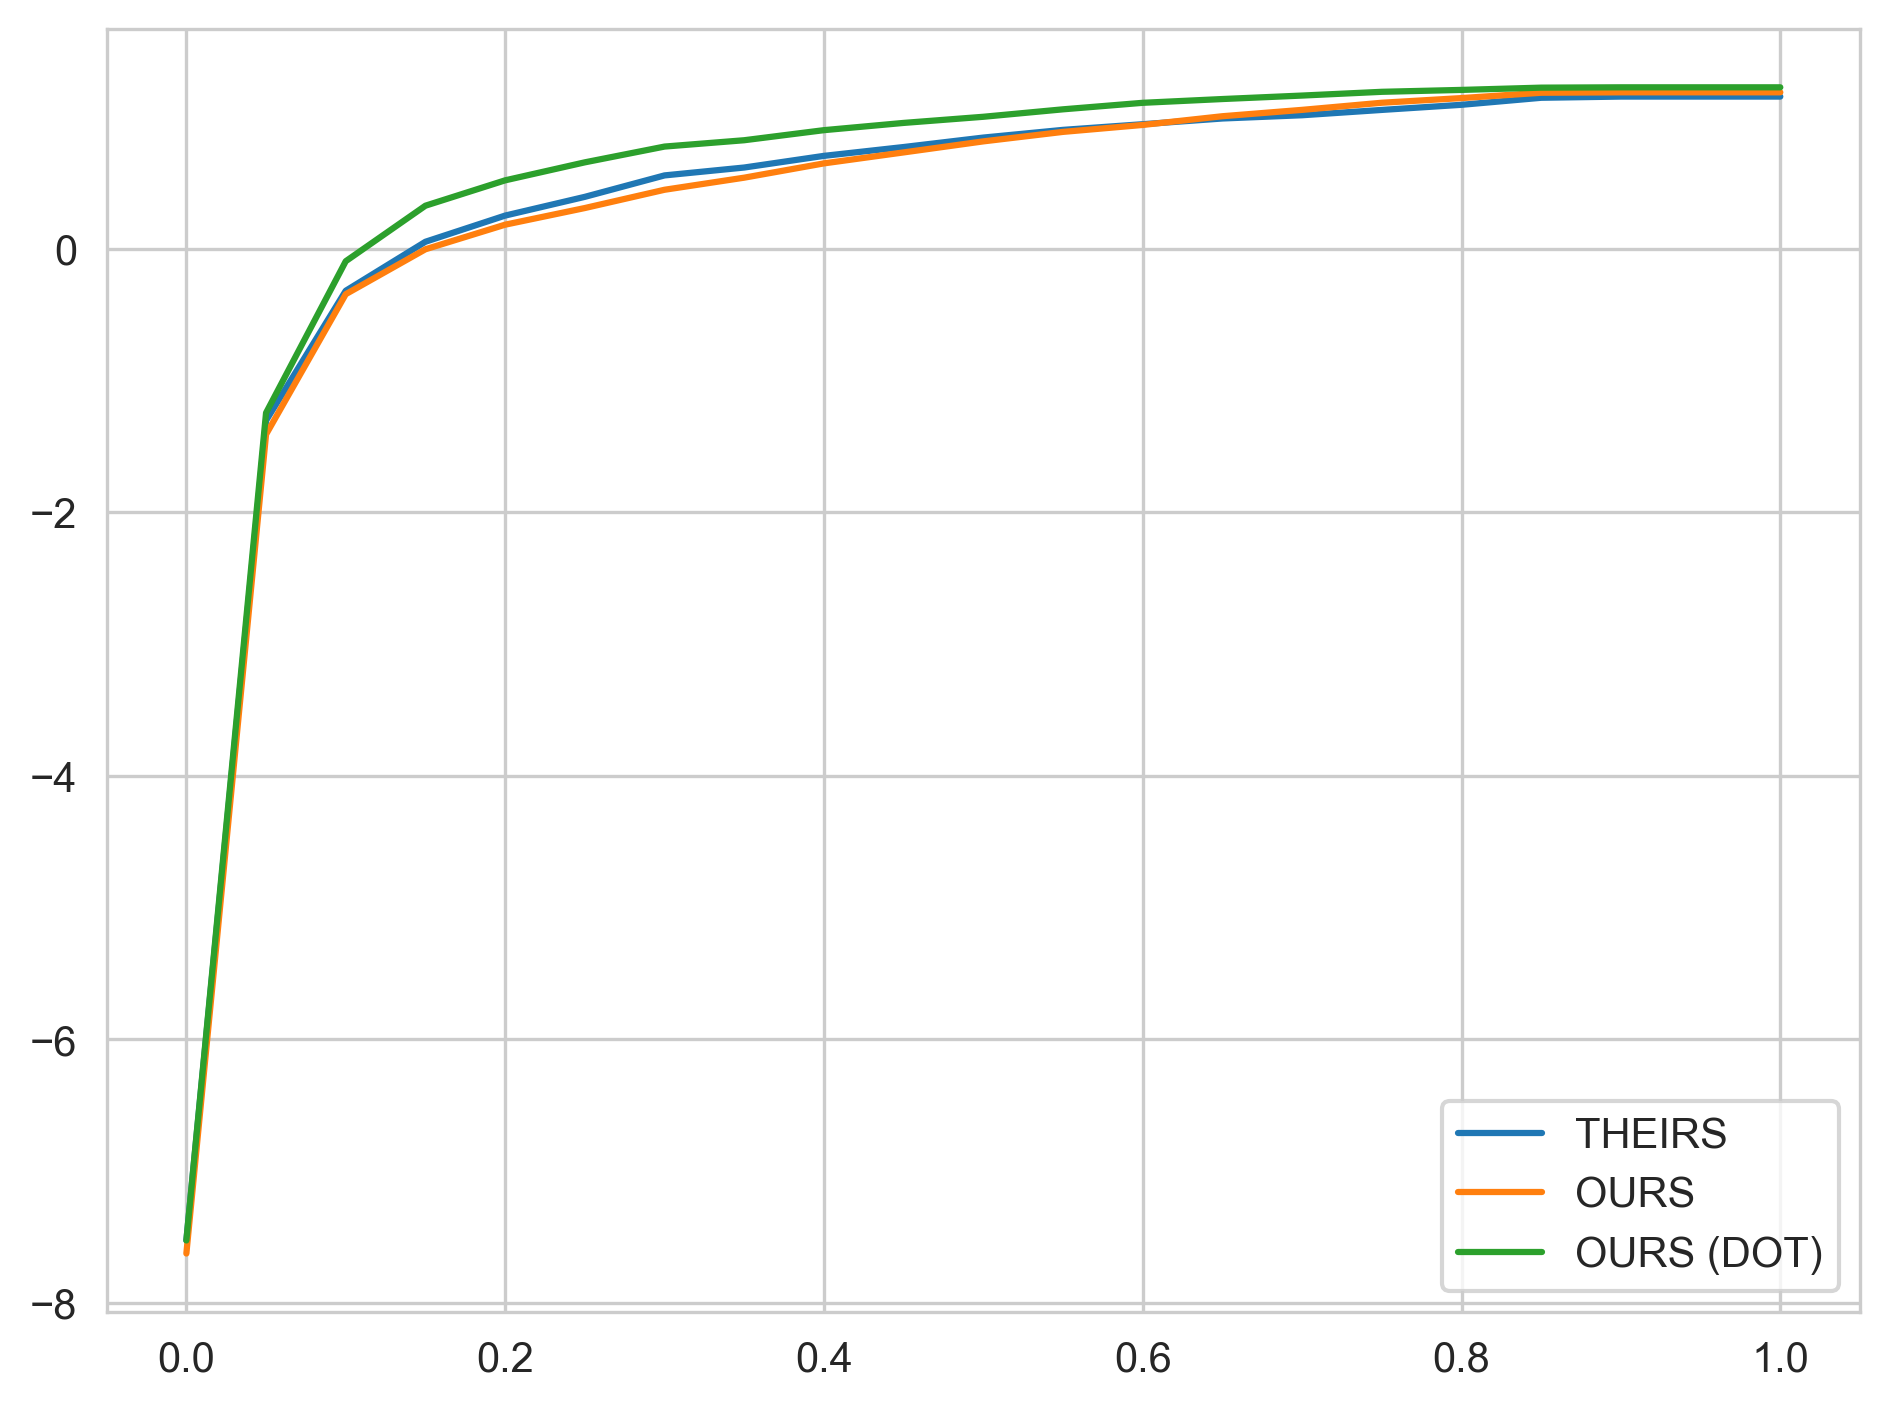

In [121]:
tgat_reddit_navs_best_fids, tgat_reddit_navs_aufsc = plot_aufsc(
    "tgat", "reddit", tgat_reddit_files, nav_explainers, "_navs")

## Simulate V1

xtg-old	 FID: 1.2157003288300767 	 AUC: 1.286538540093484
attn	 FID: 0.08469625936803361 	 AUC: 0.17859825834110377
pg	 FID: -0.37975148350709953 	 AUC: -0.3059464243195951
pbone	 FID: 0.5912627306154796 	 AUC: 0.6275241337478161


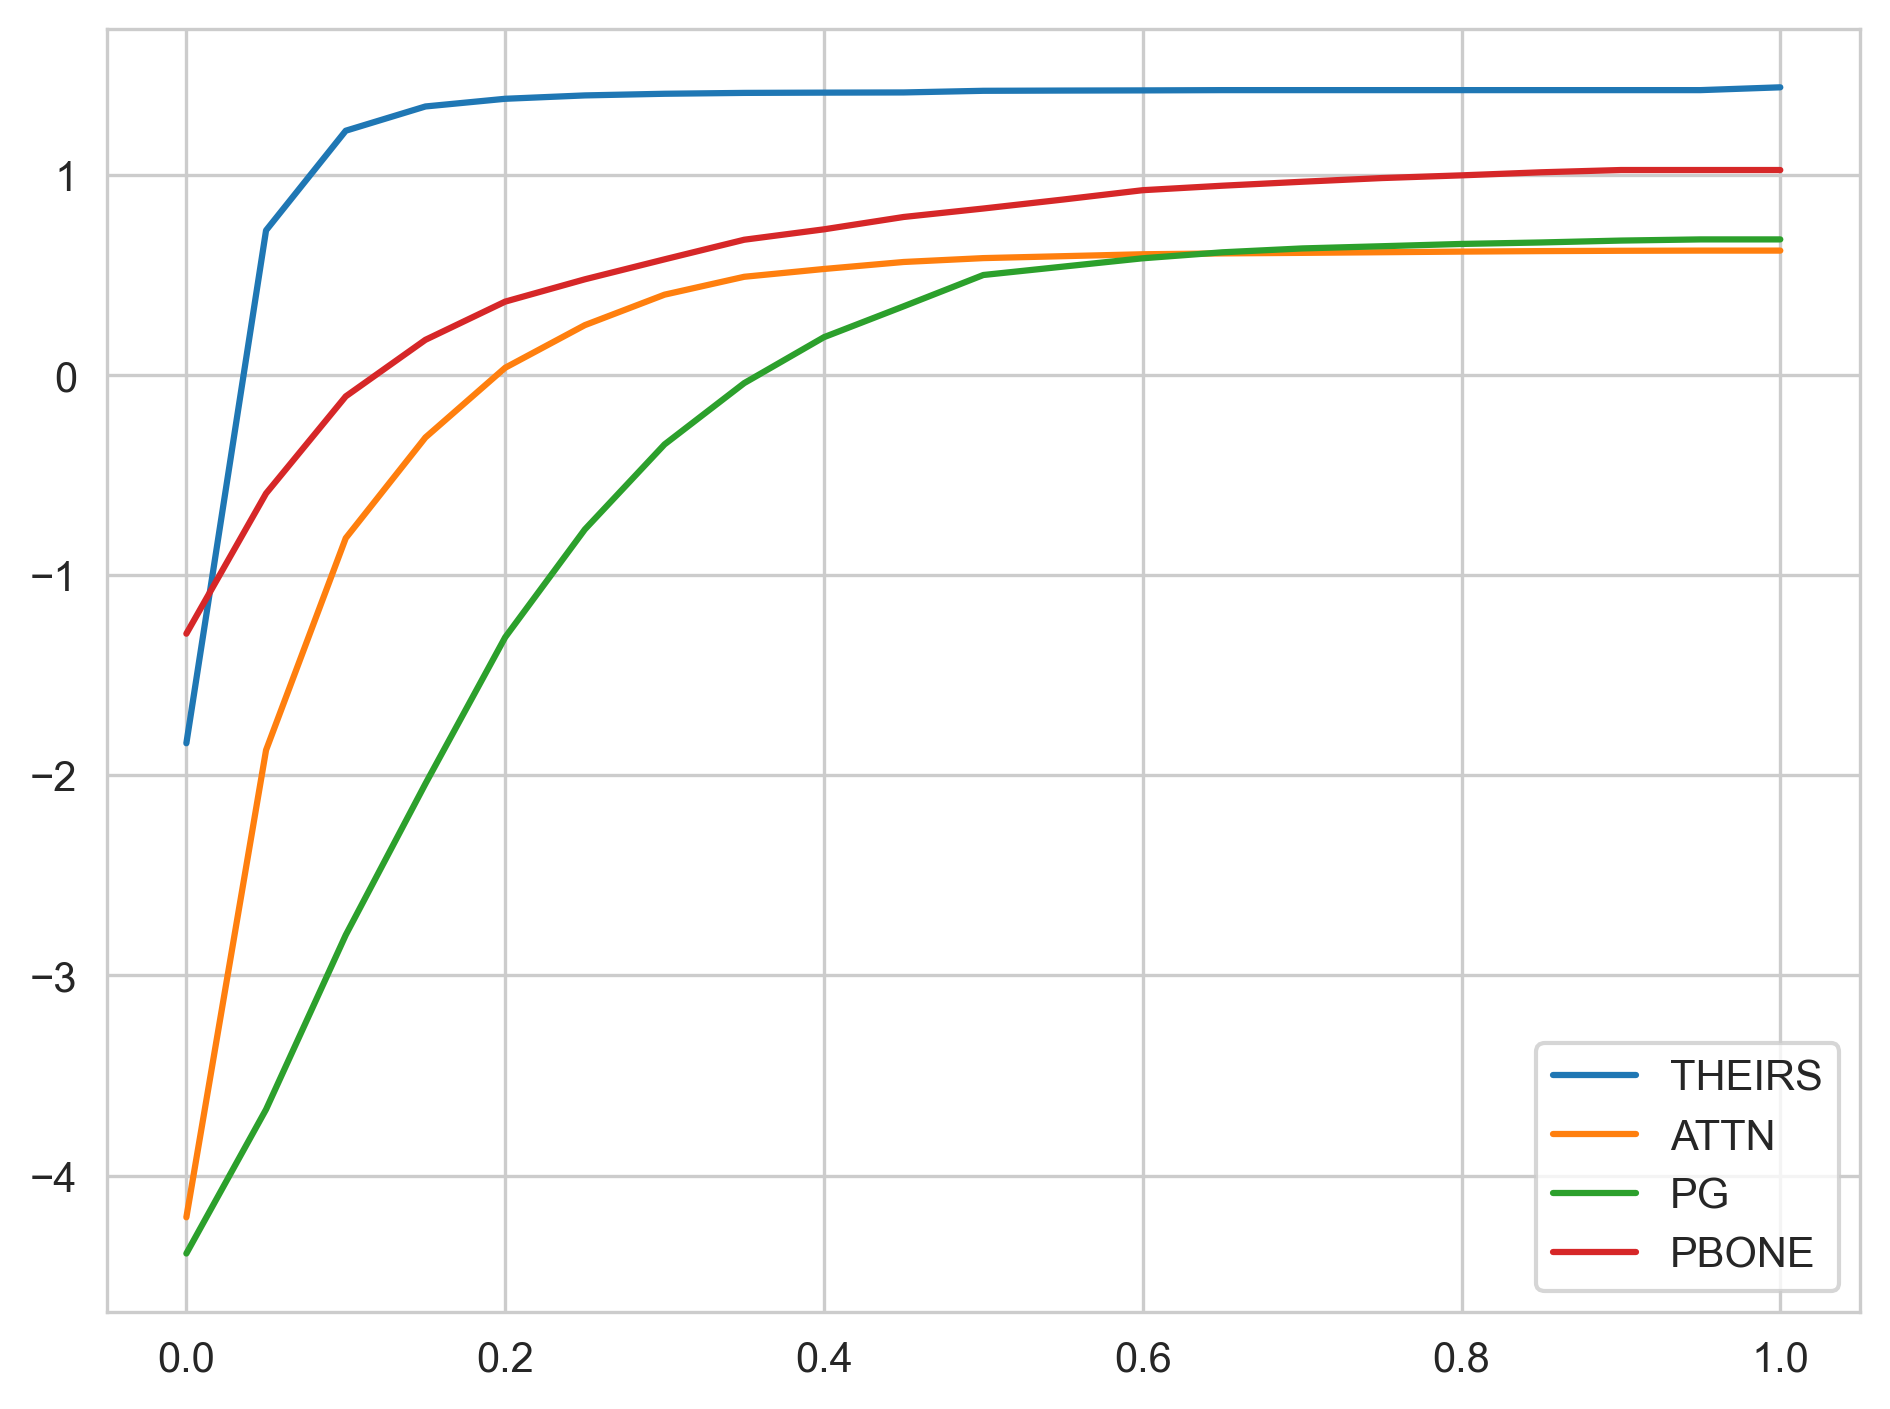

In [122]:
tgat_simulate_v1_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_pg_true_pg_positive_th20.csv",
            "tgat_simulate_v1_attn_explainer_tg_3_to_15902_eval_th20.csv",
            "tgat_simulate_v1_pg_explainer_tg_3_to_15902_eval_th20.csv",
            "tgat_simulate_v1_pbone_explainer_tg_3_to_15902_eval_th20.csv",
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_mlp_true_pg_positive_th20.csv",
            "tgat_simulate_v1_subgraphx_tg_3_to_15902_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgat_simulate_v1_best_fids, tgat_simulate_v1_aufsc = plot_aufsc("tgat", "simulate_v1", tgat_simulate_v1_files, base_explainers)

xtg-old	 FID: 1.2157003288300767 	 AUC: 1.286538540093484
xtg	 FID: 0.7393313699464005 	 AUC: 0.8547494157694278
xtg-dot	 FID: 0.3556164128690207 	 AUC: 0.4590534862788284


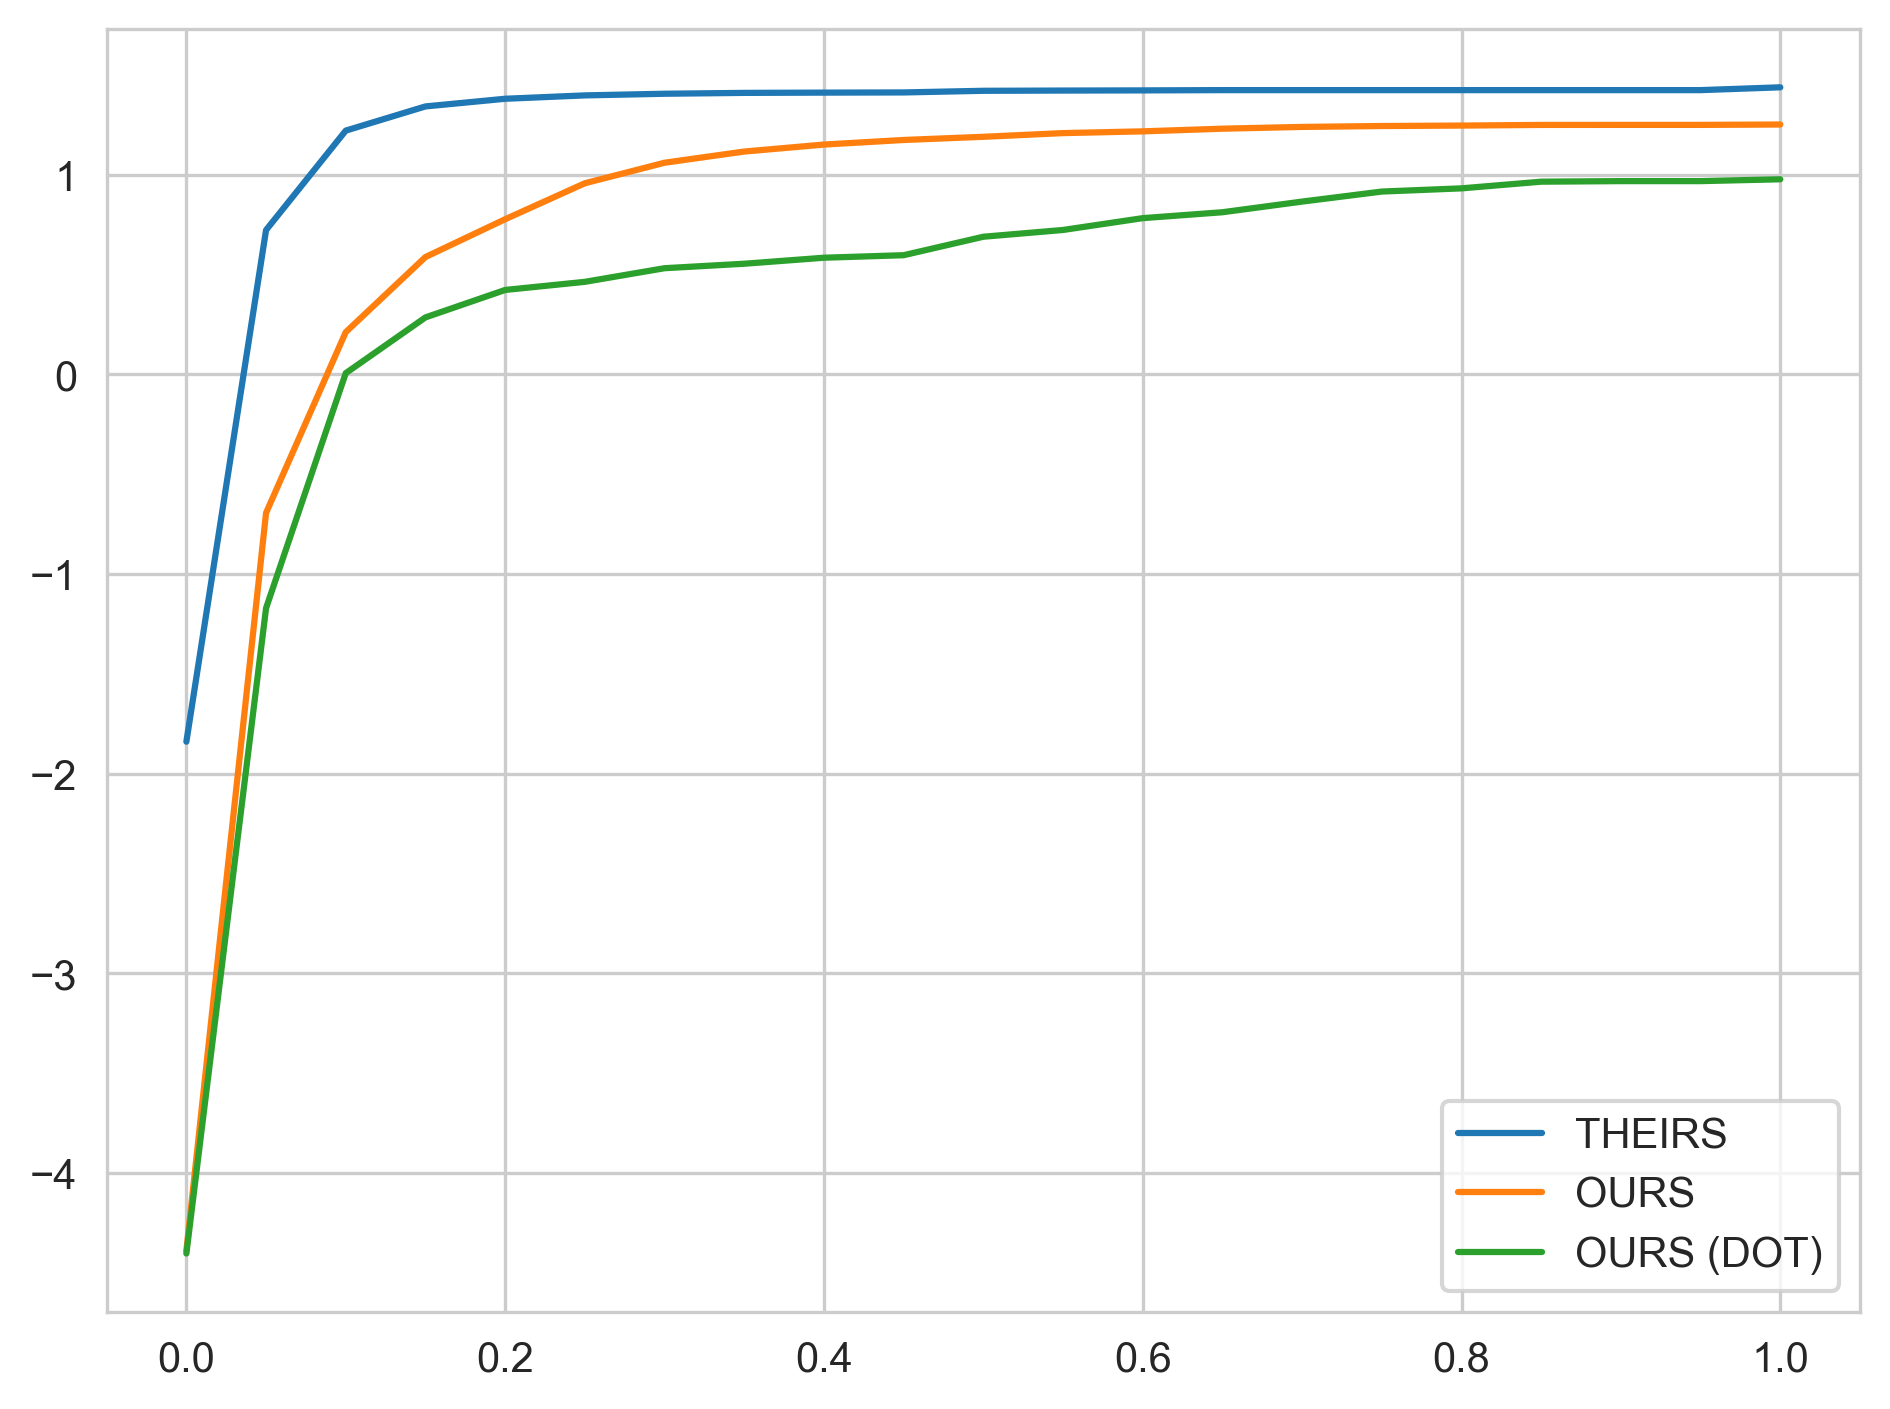

In [123]:
tgat_sim_v1_navs_best_fids, tgat_sim_v1_navs_aufsc = plot_aufsc(
    "tgat", "simulate_v1", tgat_simulate_v1_files, nav_explainers, "_navs")

## Simulate V2

xtg-old	 FID: 0.20964152156527519 	 AUC: 0.3540140500620883
attn	 FID: -0.08628384404381115 	 AUC: -0.08515523201450705
pg	 FID: 0.22628896016521113 	 AUC: 0.22783191517032678
pbone	 FID: 0.43874427439059527 	 AUC: 0.44202910242751237


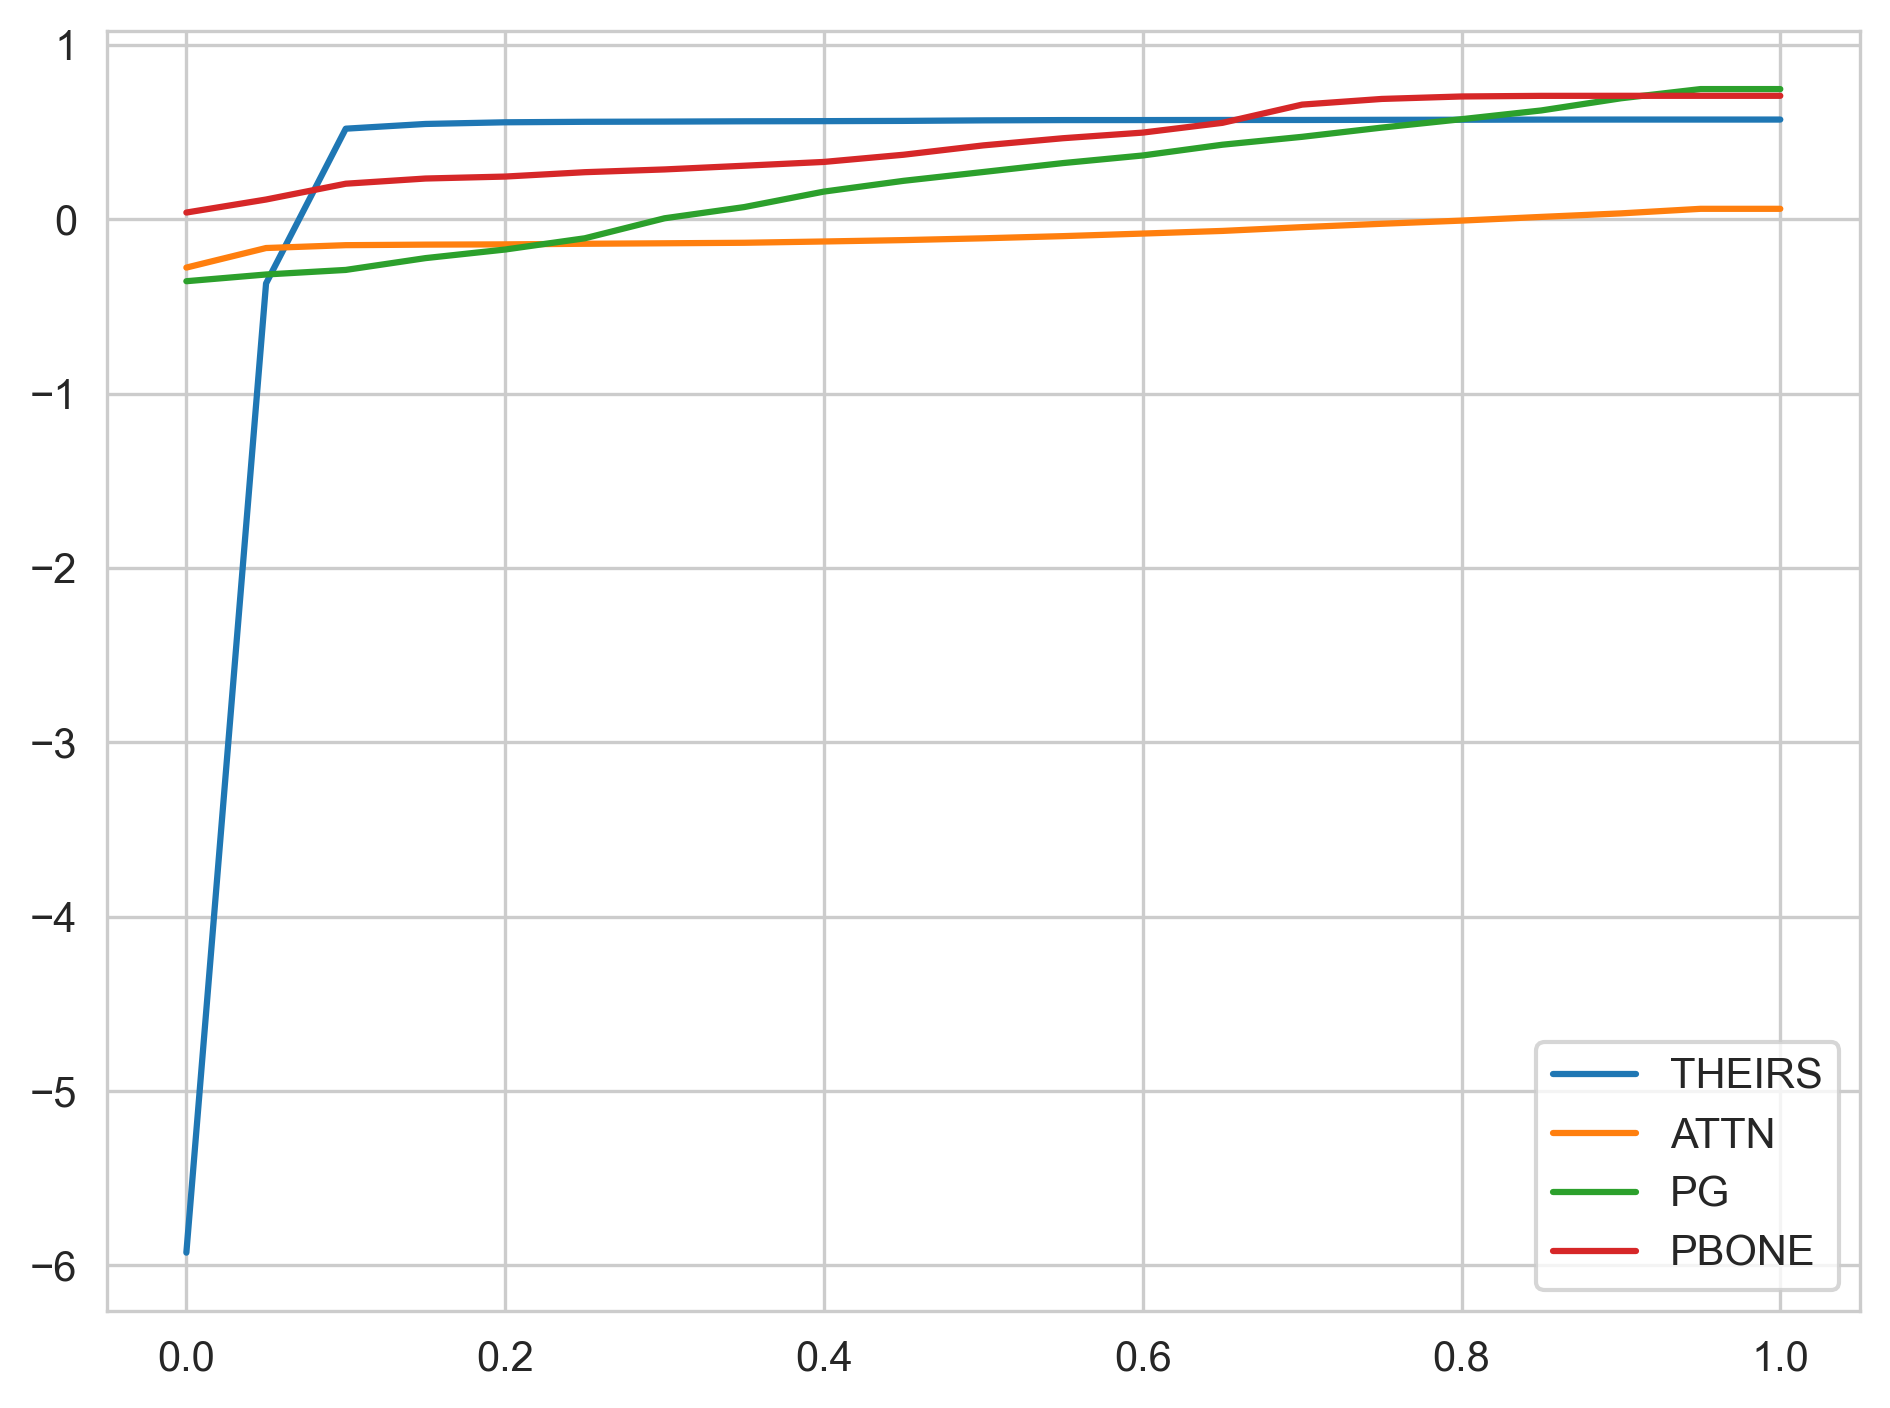

In [124]:
tgat_simulate_v2_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_pg_true_pg_positive_th20.csv",
            "tgat_simulate_v2_attn_explainer_tg_3_to_21752_eval_th20.csv",
            "tgat_simulate_v2_pg_explainer_tg_3_to_21752_eval_th20.csv",
            "tgat_simulate_v2_pbone_explainer_tg_3_to_21752_eval_th20.csv",
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_mlp_true_pg_positive_th20.csv",
            "tgat_simulate_v2_subgraphx_tg_3_to_21752_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgat_simulate_v2_best_fids, tgat_simulate_v2_aufsc = plot_aufsc("tgat", "simulate_v2", tgat_simulate_v2_files, base_explainers)

xtg-old	 FID: 0.20964152156527519 	 AUC: 0.3540140500620883
xtg	 FID: 0.6119348227970656 	 AUC: 0.6337536801677198
xtg-dot	 FID: 0.6853004503685609 	 AUC: 0.7135295922940998


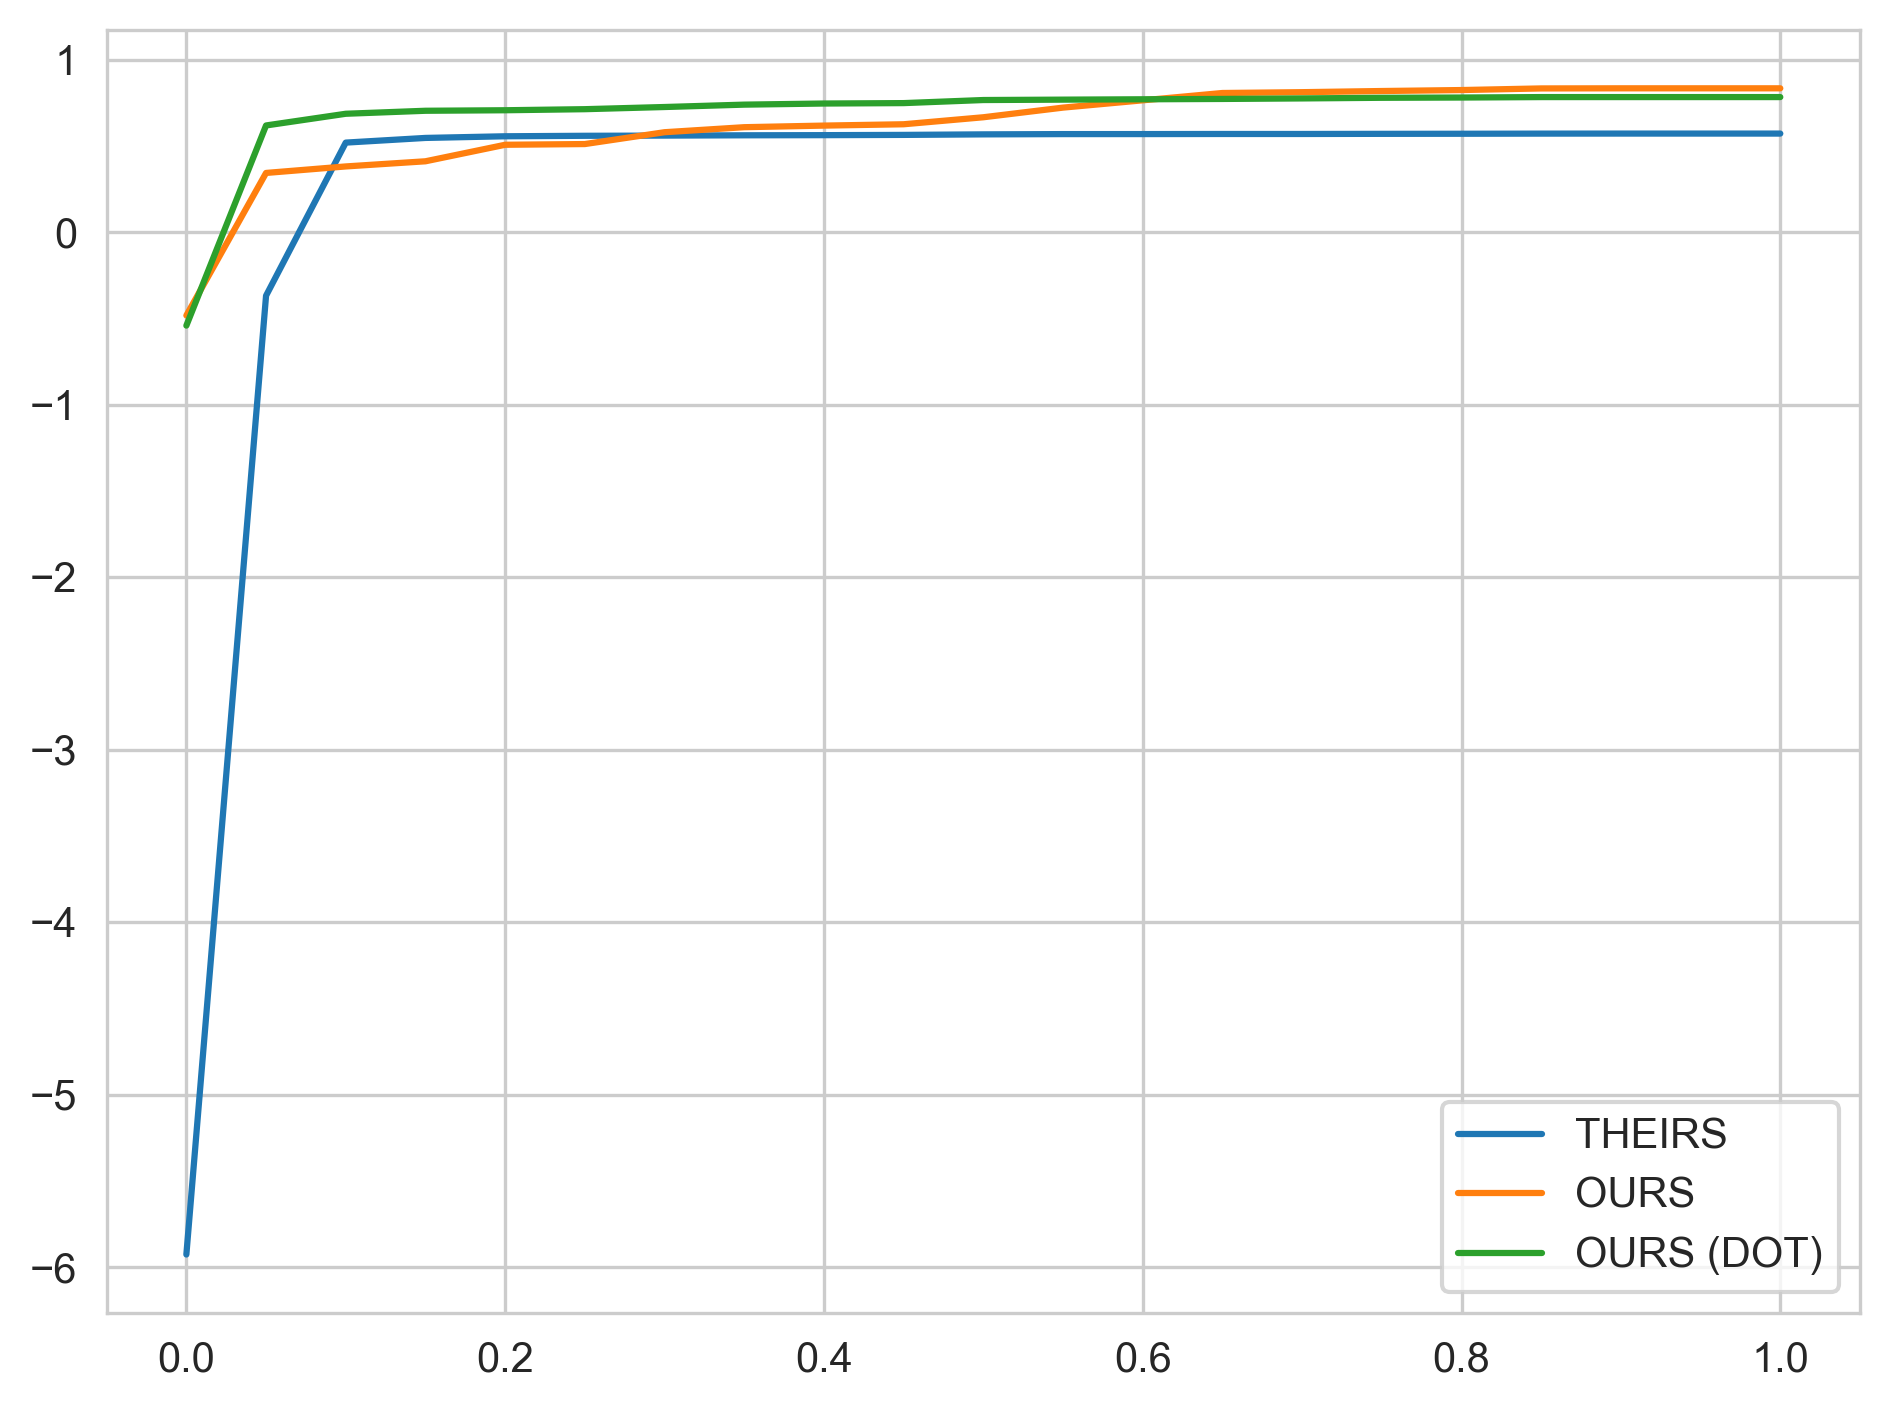

In [125]:
tgat_sim_v2_navs_best_fids, tgat_sim_v2_navs_aufsc = plot_aufsc(
    "tgat", "simulate_v2", tgat_simulate_v2_files, nav_explainers, "_navs")

# TGN
## Wikipedia

xtg-old	 FID: 0.6120316182928427 	 AUC: 0.680794889131561
attn	 FID: 0.2981450320865427 	 AUC: 0.3126810891754925
pg	 FID: -0.38489605254502524 	 AUC: -0.3673622658334673
pbone	 FID: 0.3780511539919036 	 AUC: 0.3932880073327572


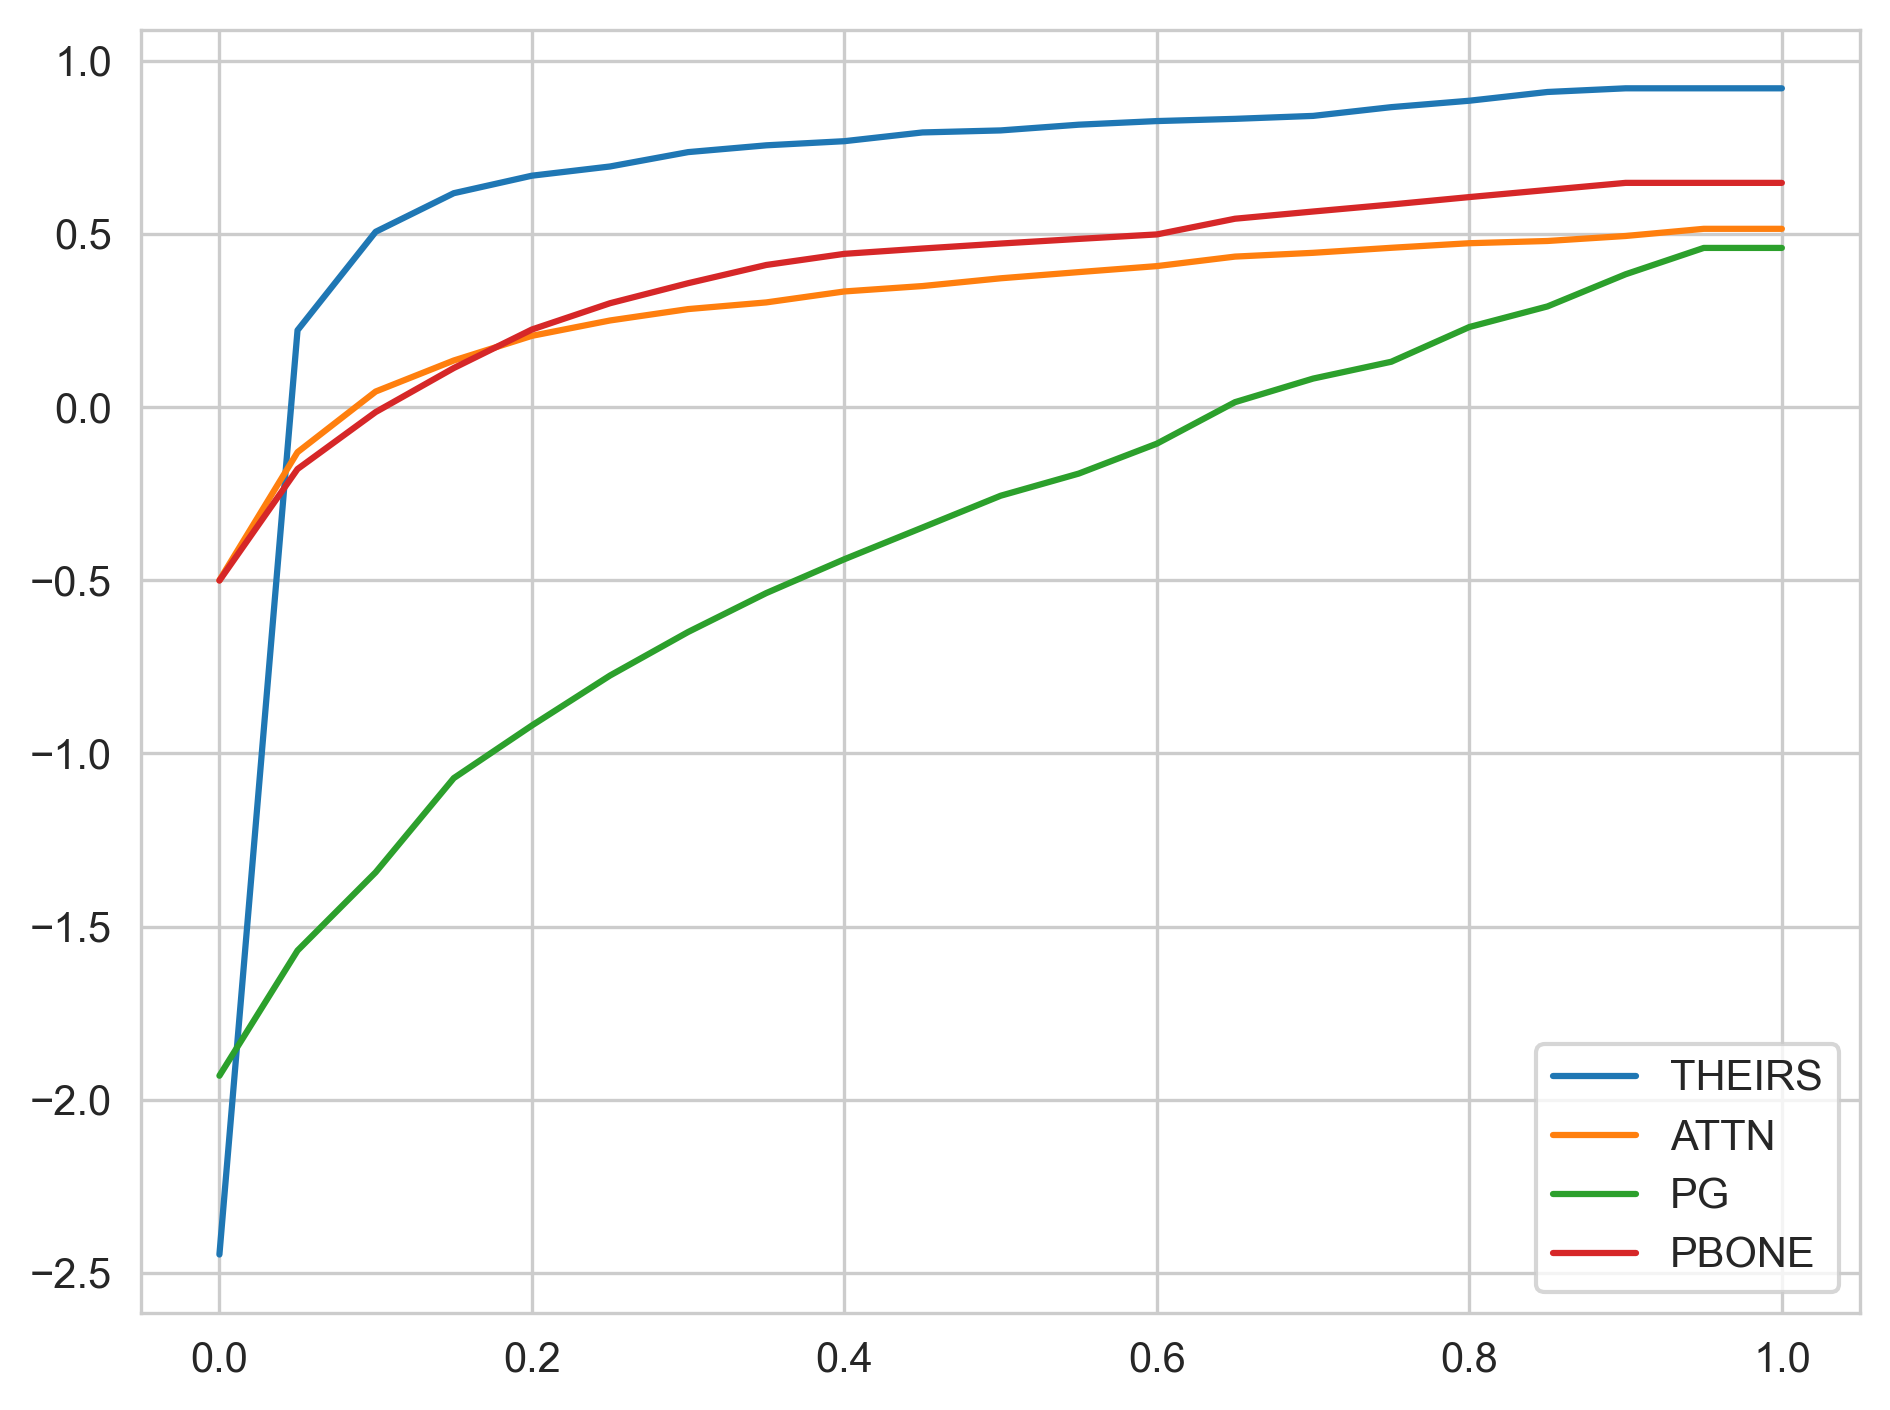

In [126]:
tgn_wikipedia_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_wikipedia_subgraphx_tg_110314_to_155151_eval_pg_true_pg_positive_th20.csv",
            "tgn_wikipedia_attn_explainer_tg_110314_to_155614_eval_th20.csv",
            "tgn_wikipedia_pg_explainer_tg_110314_to_155614_eval_th20.csv",
            "tgn_wikipedia_pbone_explainer_tg_110314_to_155614_eval_th20.csv",
            "tgn_wikipedia_subgraphx_tg_110314_to_155614_eval_mlp_true_pg_positive_th20.csv",
            "tgn_wikipedia_subgraphx_tg_110314_to_155151_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgn_wikipedia_best_fids, tgn_wikipedia_aufsc = plot_aufsc("tgn", "wikipedia", tgn_wikipedia_files, base_explainers)

xtg-old	 FID: 0.6120316182928427 	 AUC: 0.680794889131561
xtg	 FID: 0.3807884743376857 	 AUC: 0.4439554229337722
xtg-dot	 FID: 0.3204491678554387 	 AUC: 0.37488693783991034


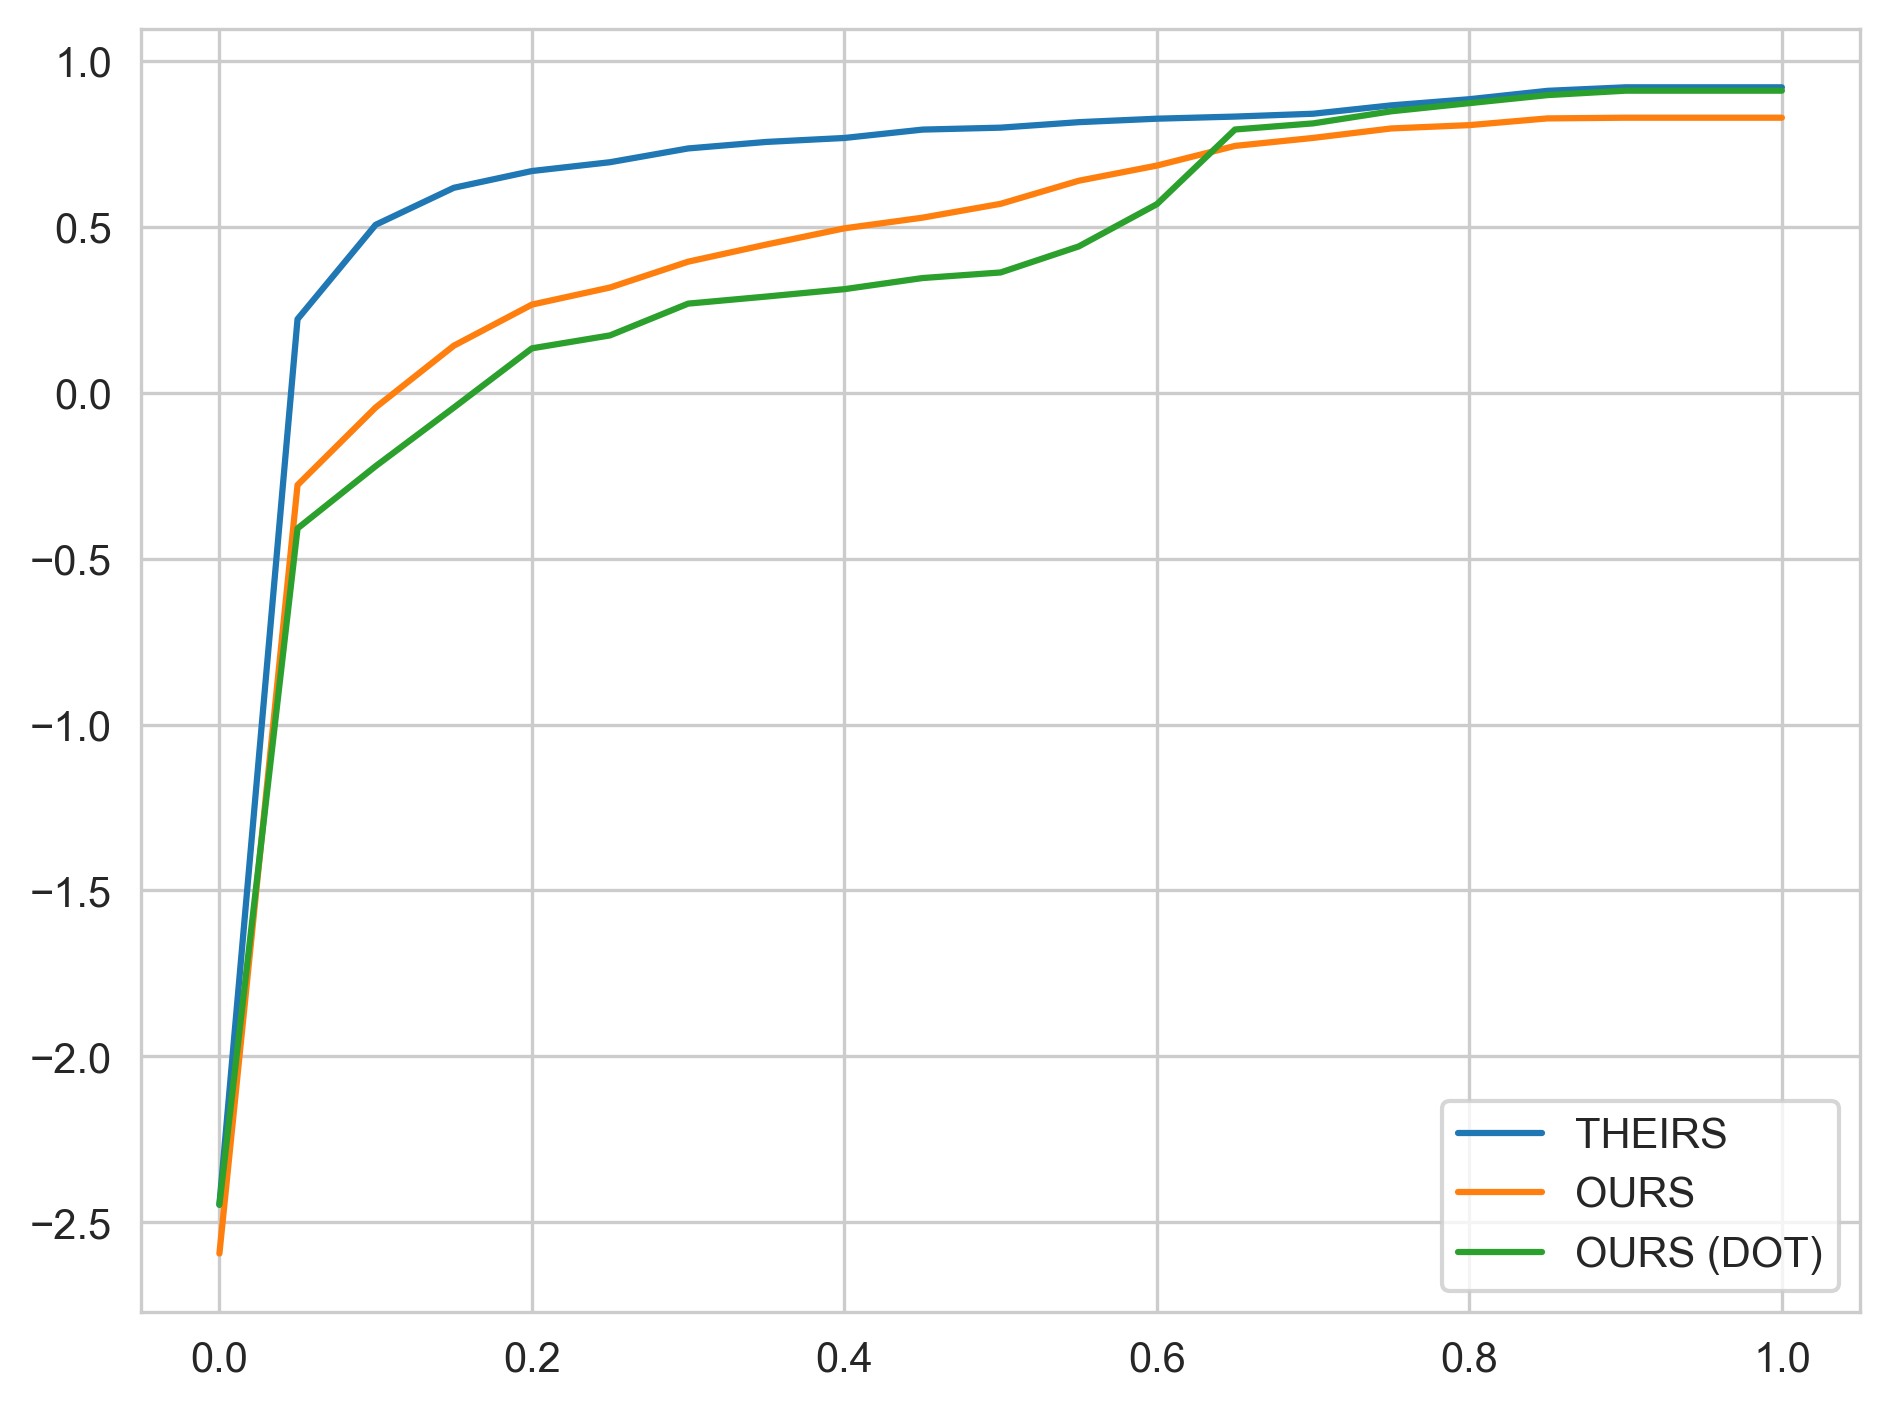

In [127]:
tgn_wikipedia_navs_best_fids, tgn_wikipedia_navs_aufsc = plot_aufsc(
    "tgn", "wikipedia", tgn_wikipedia_files, nav_explainers, "_navs")

## Reddit

xtg-old	 FID: -1.1545988581329585 	 AUC: -1.0551874579582363
attn	 FID: -1.6098138844207643 	 AUC: -1.5458064605053519
pg	 FID: -2.2424725671644725 	 AUC: -2.209208604266495
pbone	 FID: -0.687281917149822 	 AUC: -0.6292809361521156


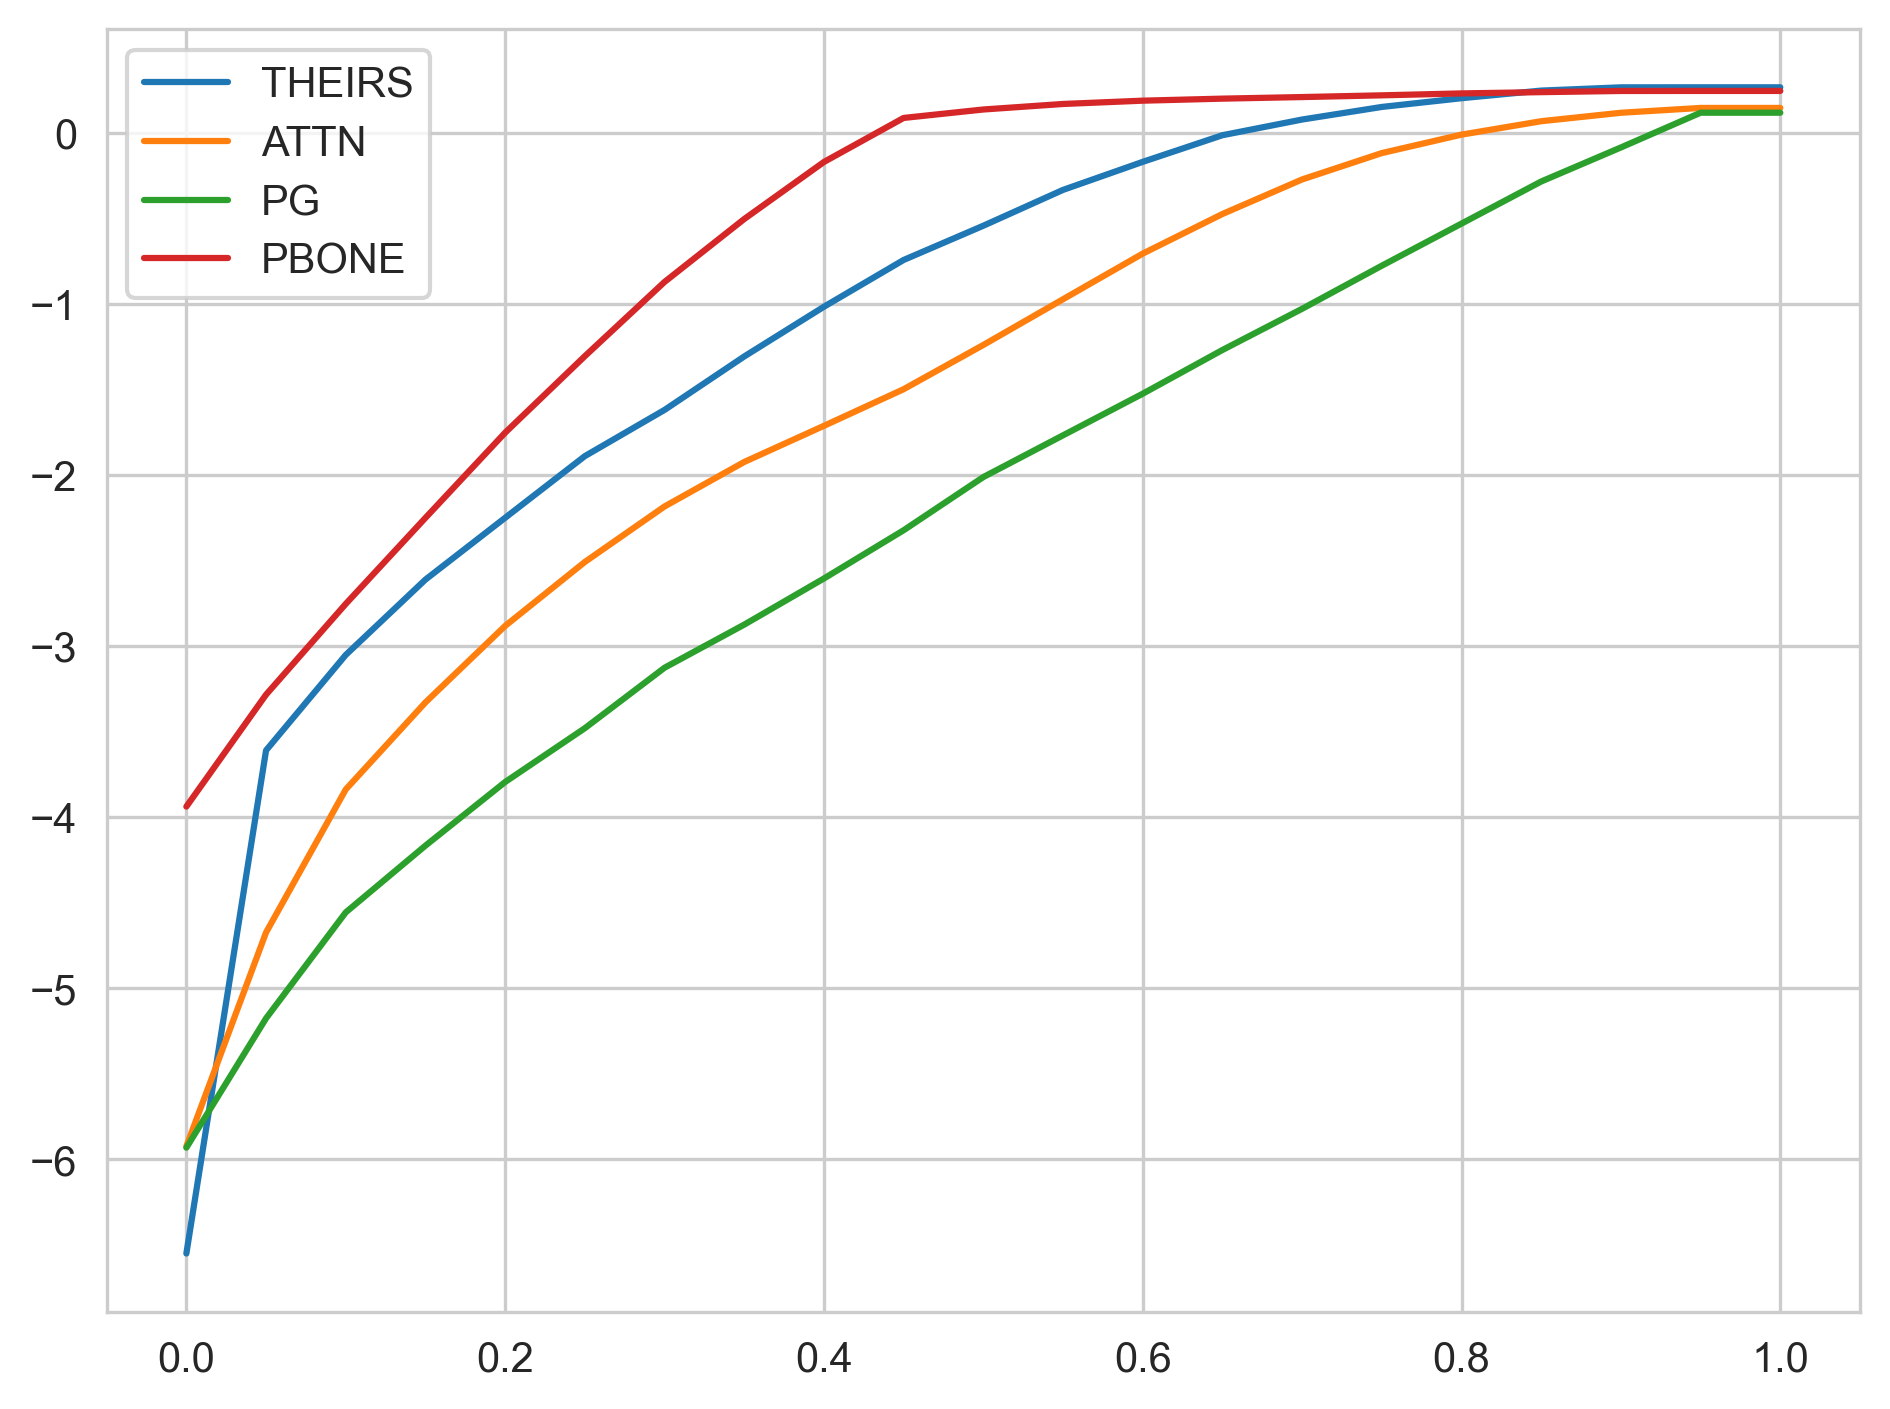

In [128]:
tgn_reddit_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_reddit_subgraphx_tg_470920_to_663534_eval_pg_true_pg_positive_th20.csv",
            "tgn_reddit_attn_explainer_tg_470920_to_665351_eval_th20.csv",
            "tgn_reddit_pg_explainer_tg_470920_to_665351_eval_th20.csv",
            "tgn_reddit_pbone_explainer_tg_470920_to_665351_eval_th20.csv",
            "tgn_reddit_subgraphx_tg_470920_to_665351_eval_mlp_true_pg_positive_th20.csv",
            "tgn_reddit_subgraphx_tg_470920_to_663534_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgn_reddit_best_fids, tgn_reddit_aufsc = plot_aufsc("tgn", "reddit", tgn_reddit_files, base_explainers)

xtg-old	 FID: -1.1545988581329585 	 AUC: -1.0551874579582363
xtg	 FID: -1.5775642664631206 	 AUC: -1.492410185137764
xtg-dot	 FID: -1.37410102603691 	 AUC: -1.2856509746834637


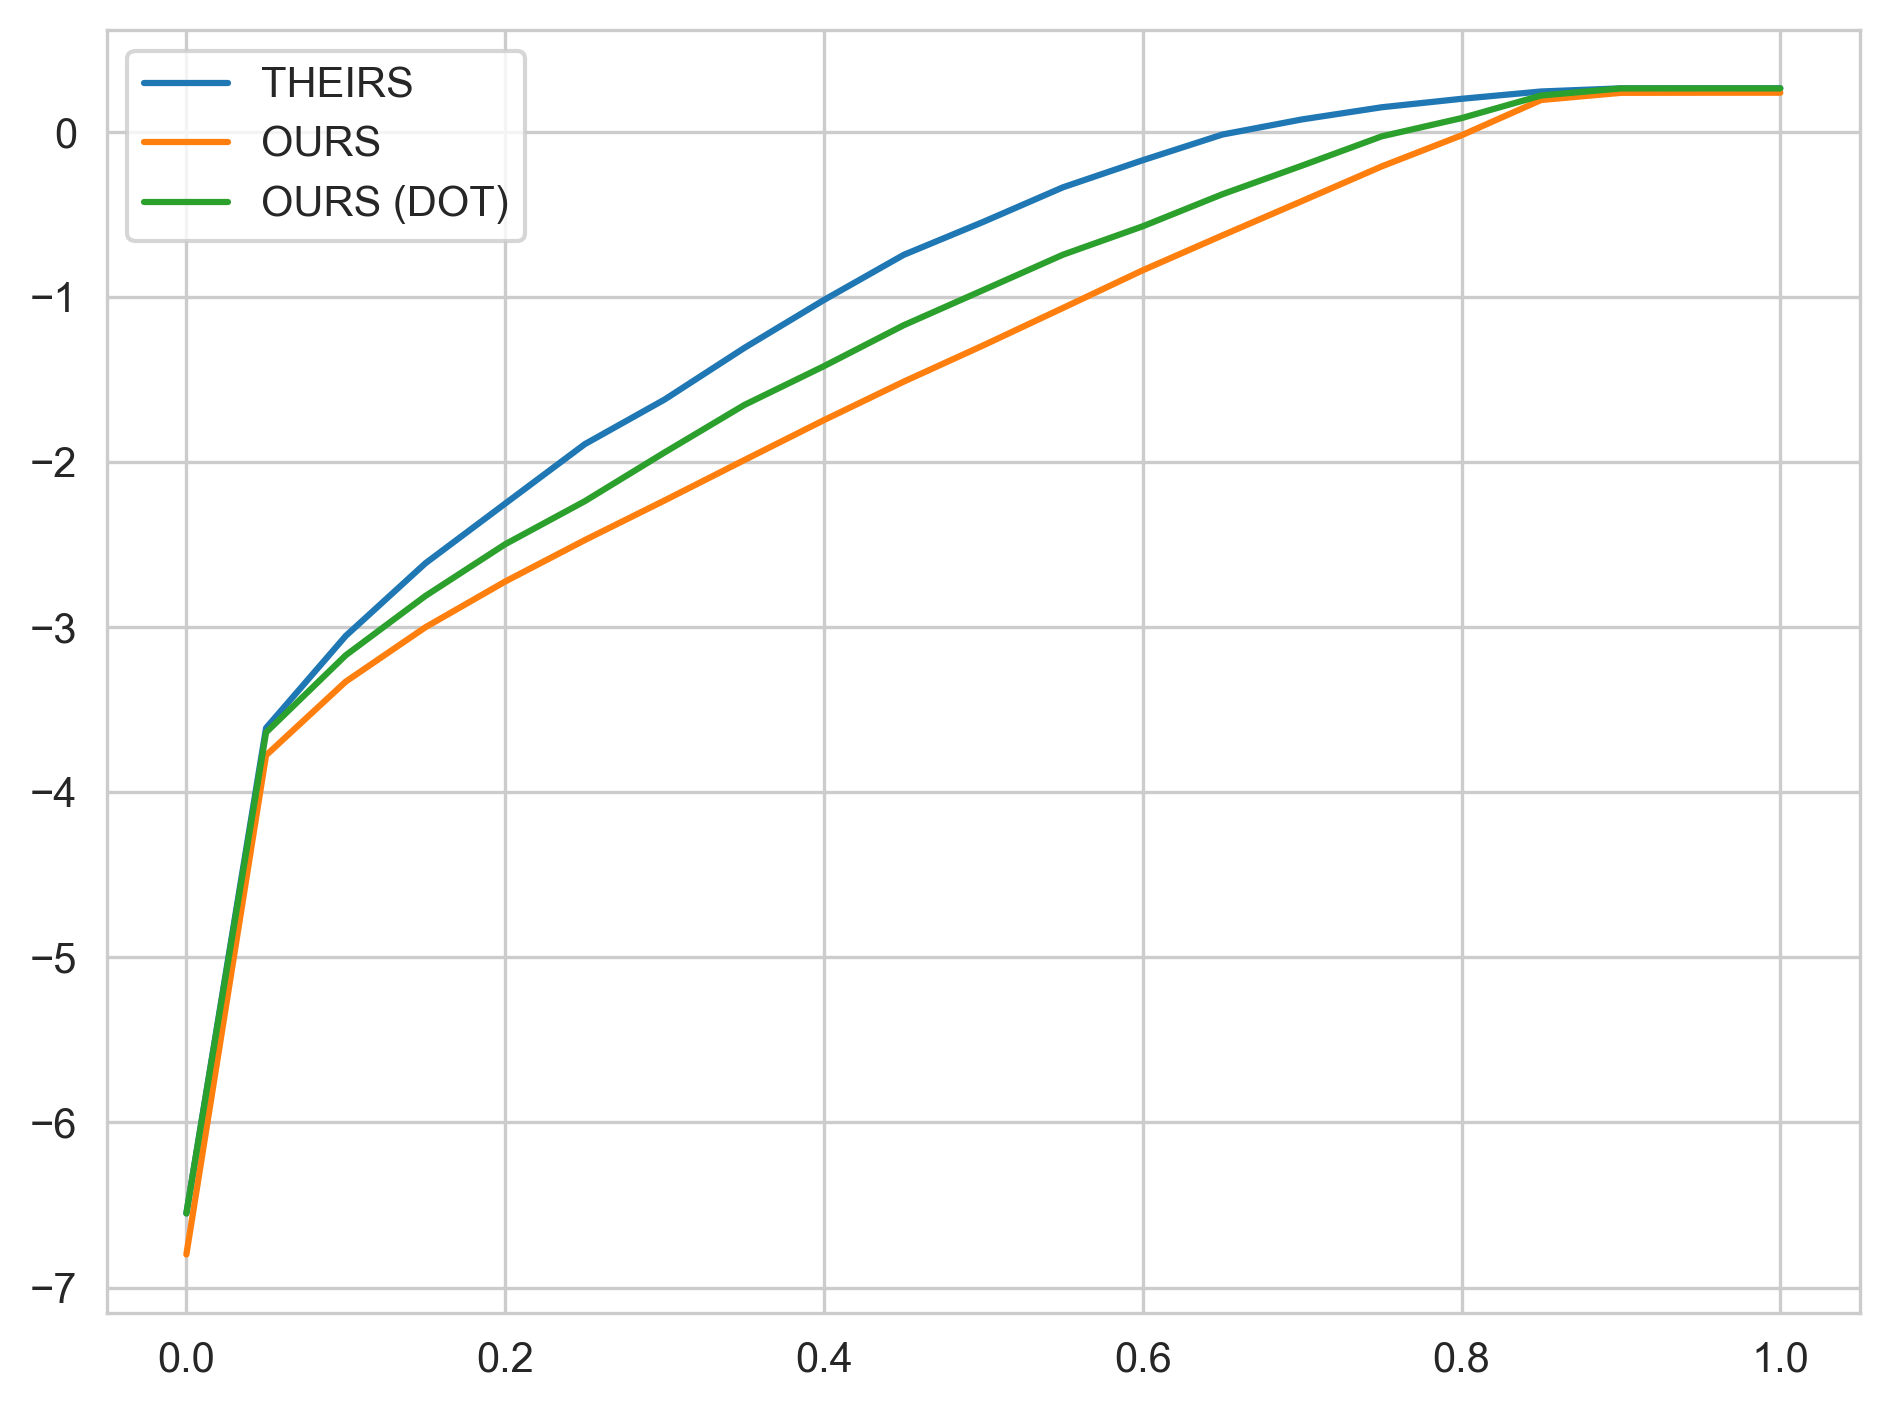

In [129]:
tgn_reddit_navs_best_fids, tgn_reddit_navs_aufsc = plot_aufsc(
    "tgn", "reddit", tgn_reddit_files, nav_explainers, "_navs")

## Simulate V1

xtg-old	 FID: 1.3558925376608482 	 AUC: 1.466395963669992
attn	 FID: 0.8182516530808948 	 AUC: 0.8892634652346372
pg	 FID: 0.03729106183846793 	 AUC: 0.09209337216615679
pbone	 FID: 0.8281643792561123 	 AUC: 0.8859449886798859


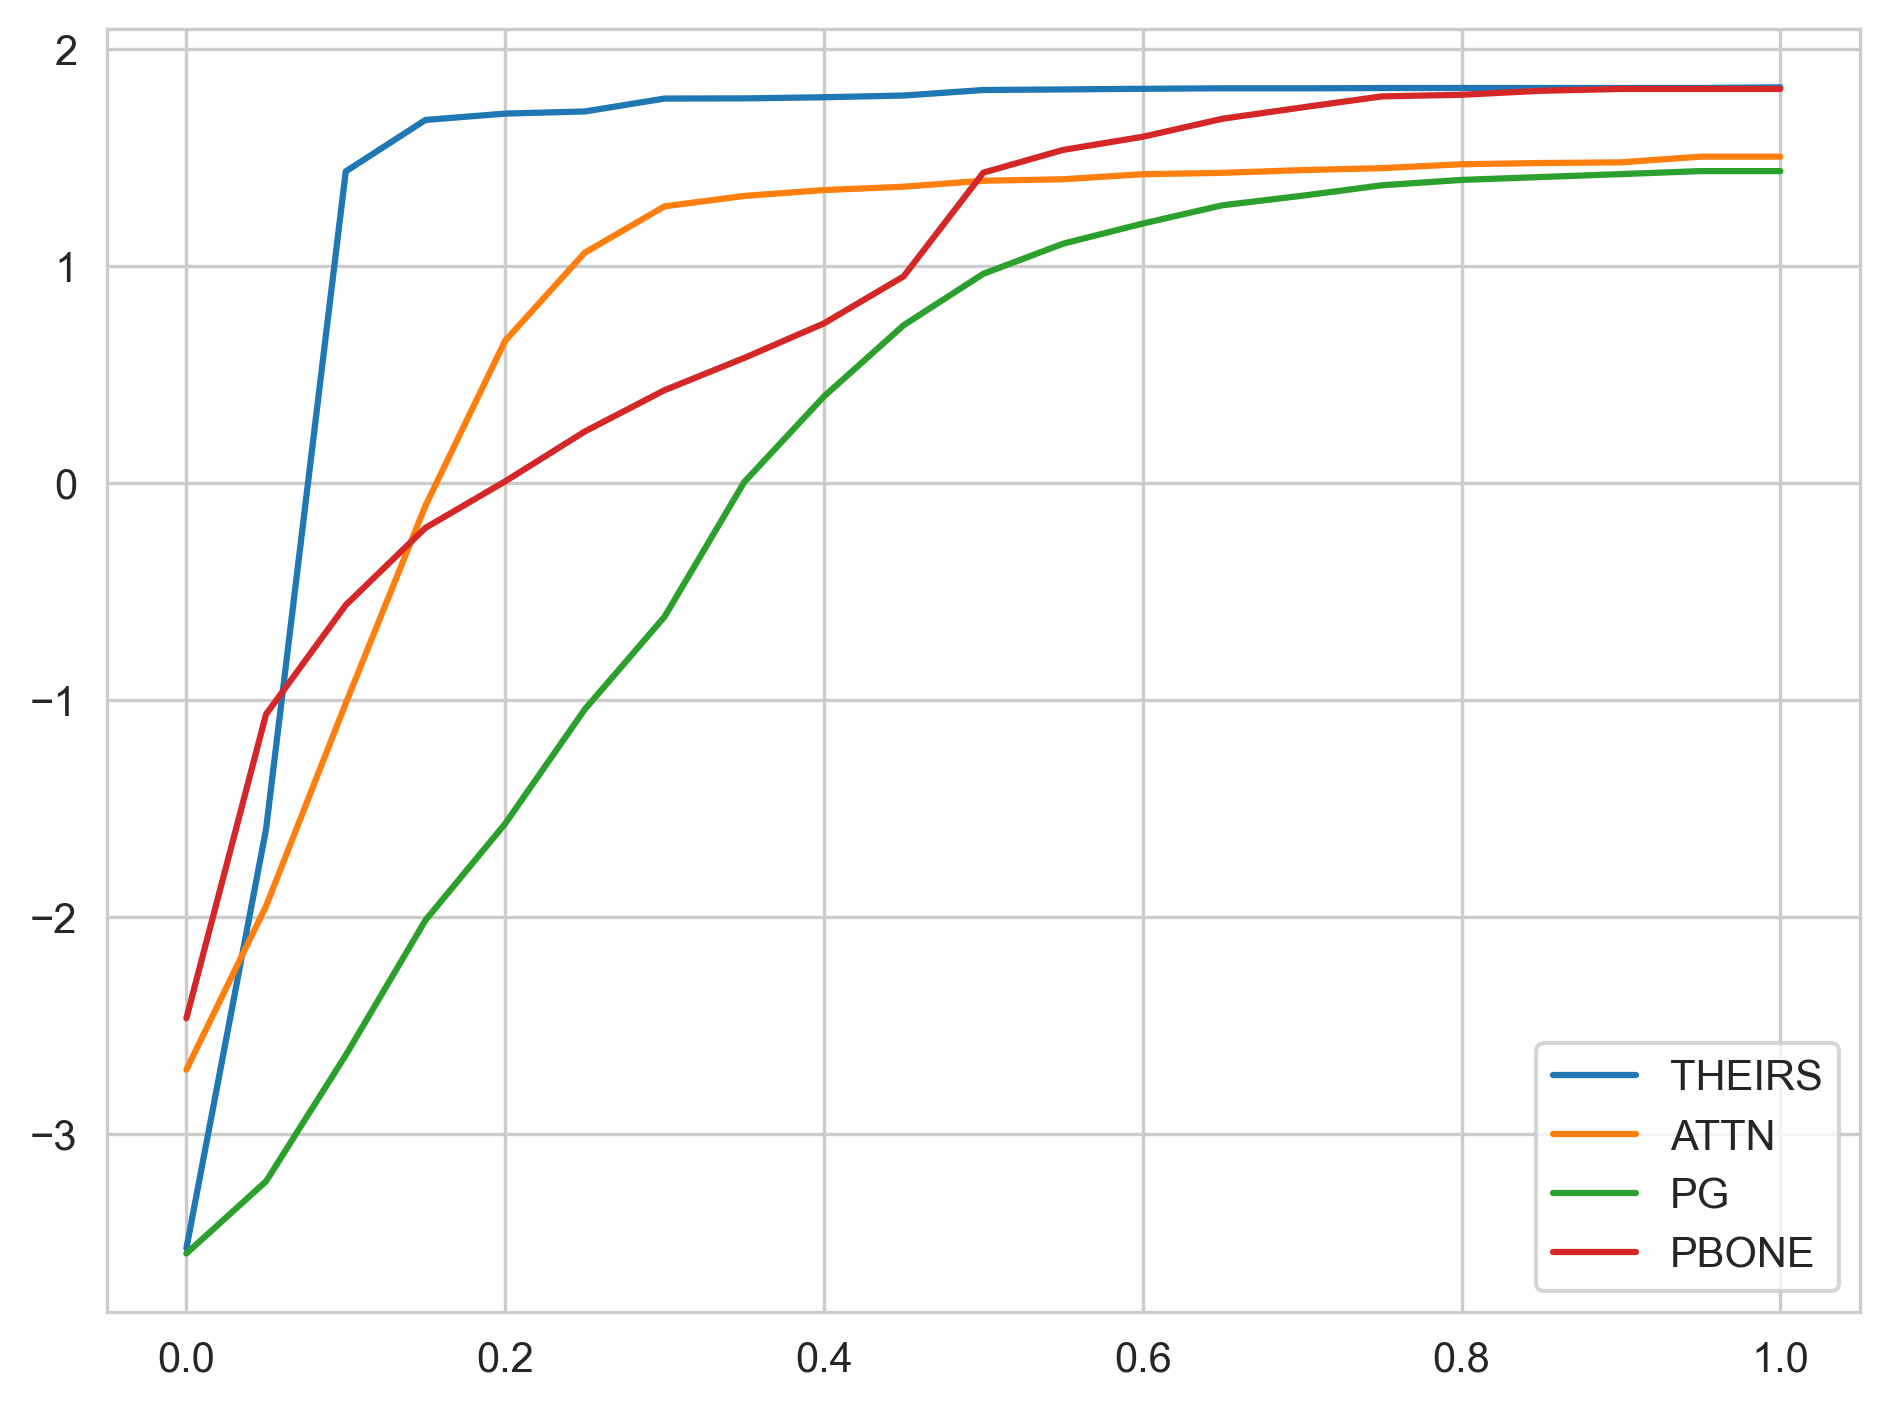

In [130]:
tgn_simulate_v1_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_pg_true_pg_positive_th20.csv",
            "tgn_simulate_v1_attn_explainer_tg_3_to_15902_eval_th20.csv",
            "tgn_simulate_v1_pg_explainer_tg_3_to_15902_eval_th20.csv",
            "tgn_simulate_v1_pbone_explainer_tg_3_to_15902_eval_th20.csv",
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_mlp_true_pg_positive_th20.csv",
            "tgn_simulate_v1_subgraphx_tg_3_to_15902_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgn_simulate_v1_best_fids, tgn_simulate_v1_aufsc = plot_aufsc("tgn", "simulate_v1", tgn_simulate_v1_files, base_explainers)

xtg-old	 FID: 1.3558925376608482 	 AUC: 1.466395963669992
xtg	 FID: 1.498000265115783 	 AUC: 1.6109038057923317
xtg-dot	 FID: 0.3287755798558895 	 AUC: 0.40095707645603257


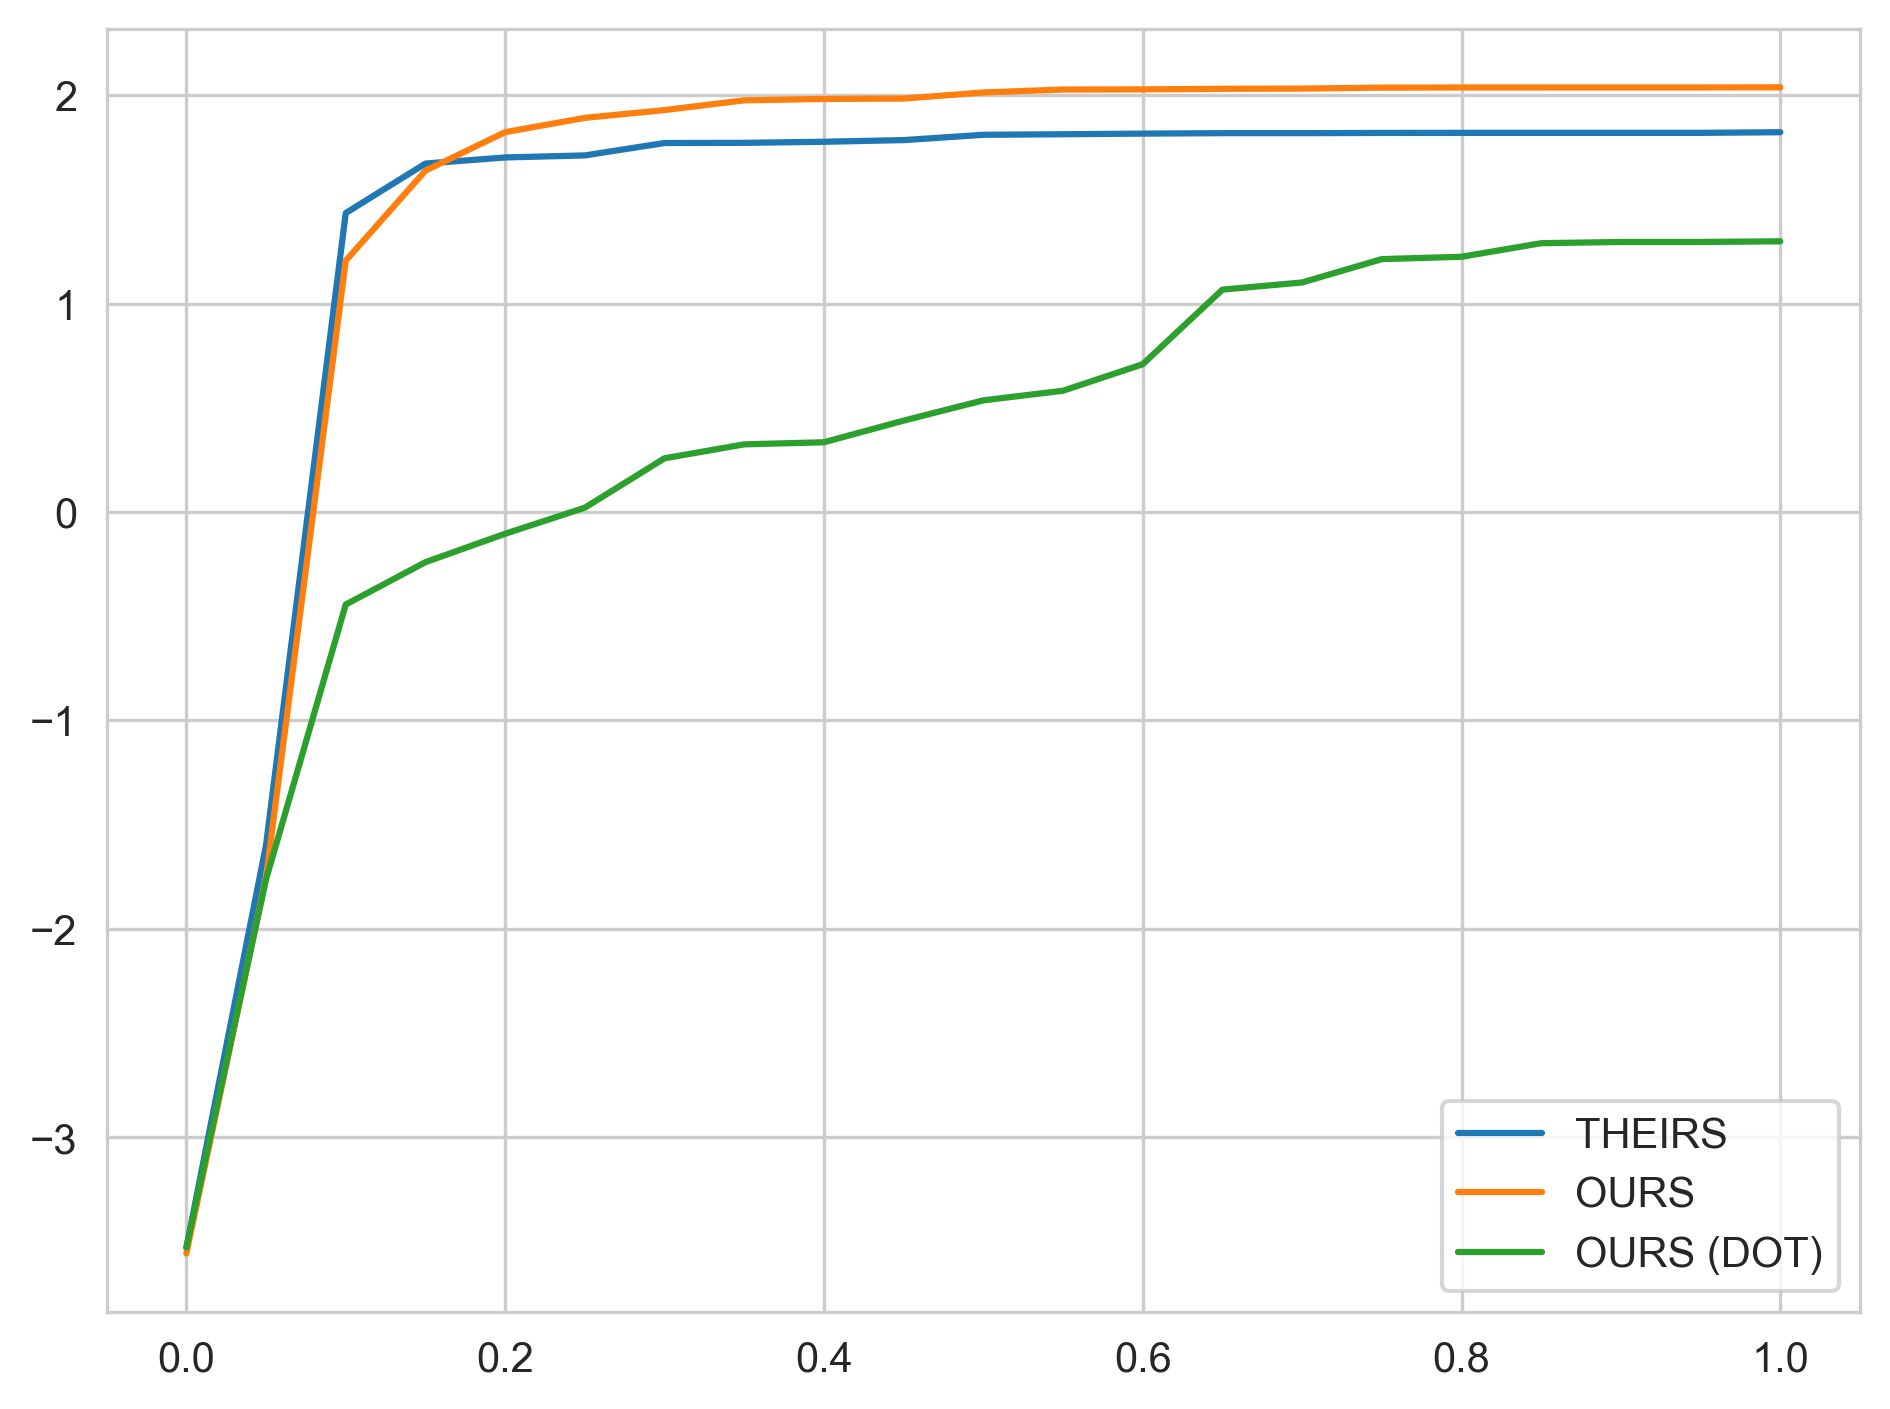

In [131]:
tgn_sim_v1_navs_best_fids, tgn_sim_v1_navs_aufsc = plot_aufsc(
    "tgn", "simulate_v1", tgn_simulate_v1_files, nav_explainers, "_navs")

## Simulate V2

xtg-old	 FID: 1.520598385013452 	 AUC: 1.7535006515535654
attn	 FID: -0.7508437722211792 	 AUC: -0.6773320452421904
pg	 FID: -1.973928028279827 	 AUC: -1.903435571766645
pbone	 FID: -0.44799221205853296 	 AUC: -0.29036131019219763


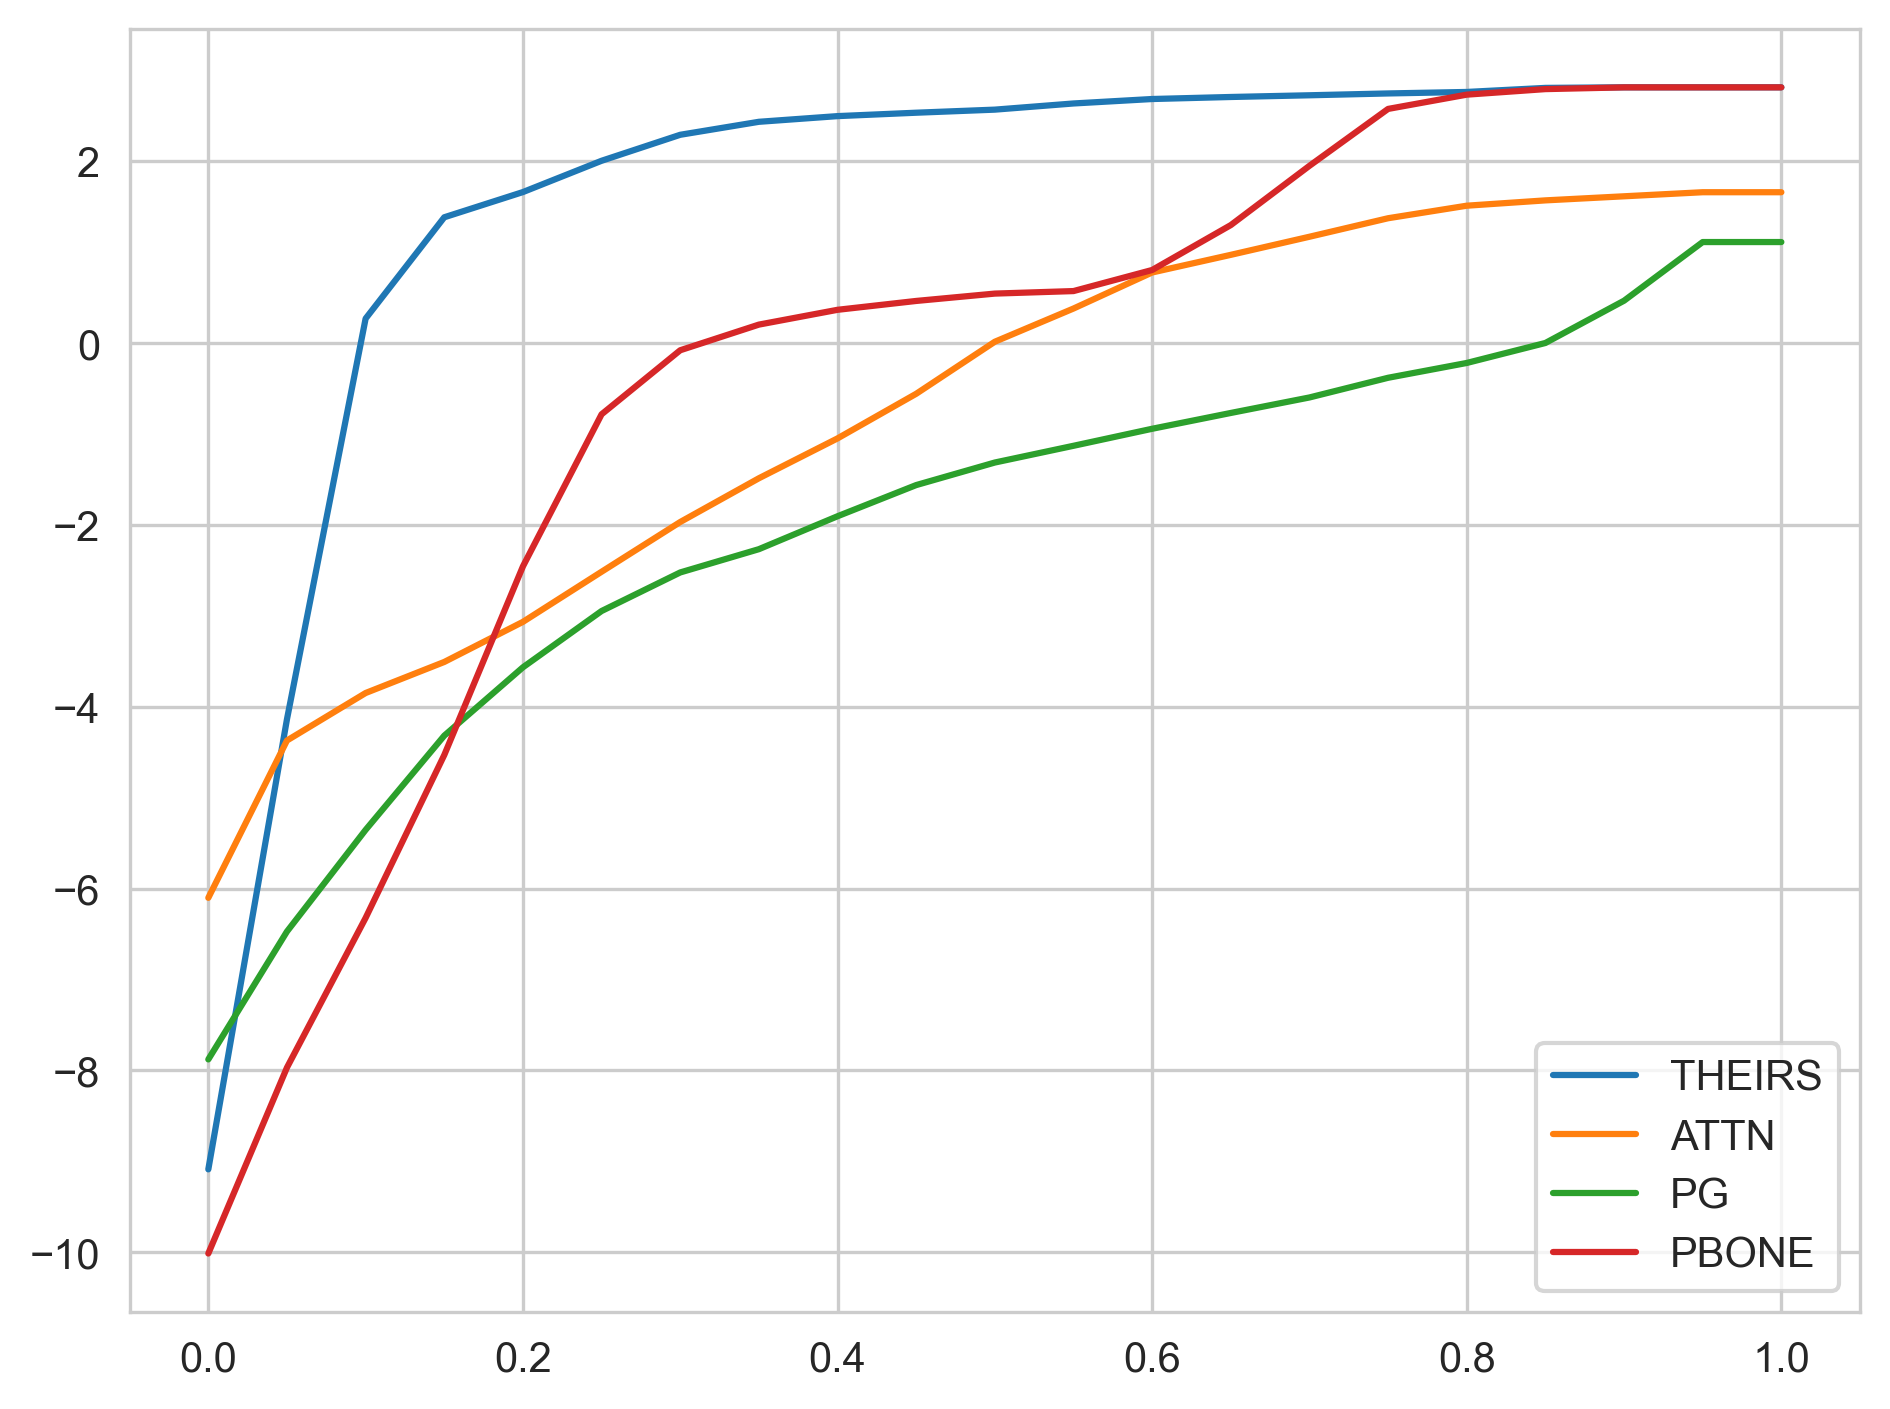

In [132]:
tgn_simulate_v2_files = {
    k: results_path / v
    for k, v in zip(
        explainers,
        [
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_pg_true_pg_positive_th20.csv",
            "tgn_simulate_v2_attn_explainer_tg_3_to_21752_eval_th20.csv",
            "tgn_simulate_v2_pg_explainer_tg_3_to_21752_eval_th20.csv",
            "tgn_simulate_v2_pbone_explainer_tg_3_to_21752_eval_th20.csv",
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_mlp_true_pg_positive_th20.csv",
            "tgn_simulate_v2_subgraphx_tg_3_to_21752_eval_dot_true_pg_positive_th20.csv"
        ],
    )
}

tgn_simulate_v2_best_fids, tgn_simulate_v2_aufsc = plot_aufsc(
    "tgn", "simulate_v2", tgn_simulate_v2_files, base_explainers)

xtg-old	 FID: 1.520598385013452 	 AUC: 1.7535006515535654
xtg	 FID: 0.6921149914179529 	 AUC: 0.8982748537071047
xtg-dot	 FID: 0.49621543384232764 	 AUC: 0.6745564420579695


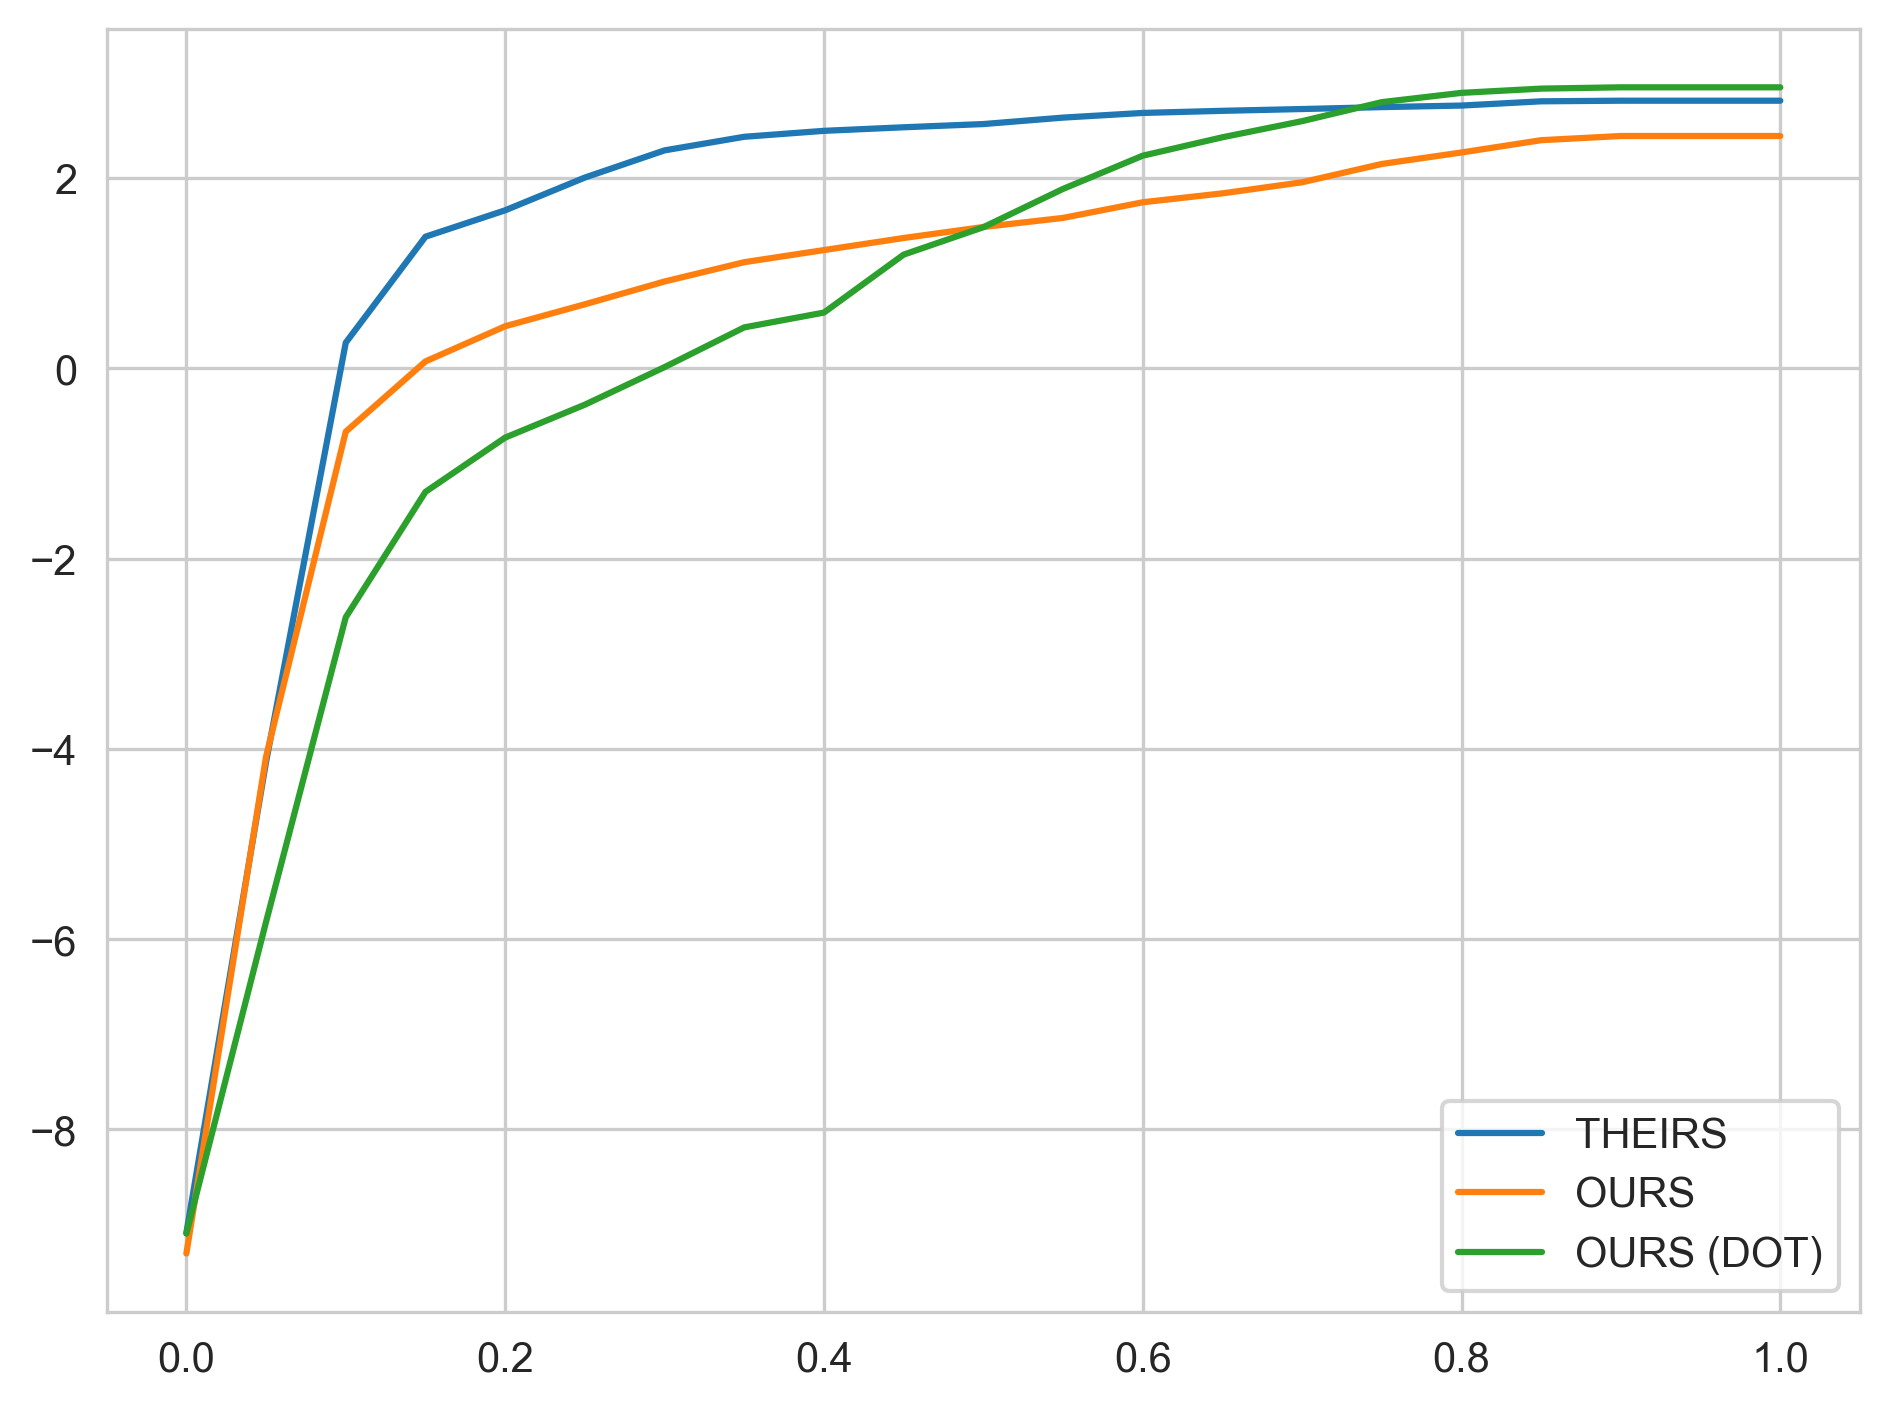

In [133]:
tgn_sim_v2_navs_best_fids, tgn_sim_v2_navs_aufsc = plot_aufsc(
    "tgn", "simulate_v2", tgn_simulate_v2_files, nav_explainers, "_navs")

# Assemble everything
Here we assemble everything into a single dataframe and save it to a csv file.

In [134]:
datasets = ("wikipedia", "reddit", "simulate_v1", "simulate_v2")

model = "tgat"
locs = locals()
d1 = {
    f"{model}_{dataset}_best_fids": locs[f"{model}_{dataset}_best_fids"]
    for dataset in datasets
}
d2 = {
    f"{model}_{dataset}_aufsc": locs[f"{model}_{dataset}_aufsc"] for dataset in datasets
}

# zip the two in order to be side by side, my brain is fried i got no better suggestion
d = {}
for (k, v), (k2, v2) in zip(d1.items(), d2.items()):
    d[k] = v
    d[k2] = v2

df_tgat = pd.DataFrame.from_dict(d, orient="columns")

index = pd.MultiIndex(
    levels=[
        ["Wikipedia", "Reddit", "Simulate V1", "Simulate V2"],
        ["Best FID", "AUFSC"],
    ],
    codes=[
        [0, 0, 1, 1, 2, 2, 3, 3],
        [0, 1, 0, 1, 0, 1, 0, 1],
    ],
    names=["", ""],
)

df_tgat.columns = index
df_tgat.index = labels.values()
df_tgat = df_tgat.T[
    ["ATTN", "PBONE", "PG", "THEIRS", "OURS", "OURS (DOT)"]
].T  # reorder rows to correspond to their order

df_diff = (df_tgat - df_tgat_theirs) / df_tgat_theirs


datasets = ("wikipedia", "reddit", "simulate_v1", "simulate_v2")

# model = "tgat"
model = "tgn"

locs = locals()
d1 = {
    f"{model}_{dataset}_best_fids": locs[f"{model}_{dataset}_best_fids"]
    for dataset in datasets
}
d2 = {
    f"{model}_{dataset}_aufsc": locs[f"{model}_{dataset}_aufsc"] for dataset in datasets
}

# zip the two in order to be side by side, my brain is fried i got no better suggestion
d = {}
for (k, v), (k2, v2) in zip(d1.items(), d2.items()):
    d[k] = v
    d[k2] = v2

df_tgat = pd.DataFrame.from_dict(d, orient="columns")

index = pd.MultiIndex(
    levels=[
        ["Wikipedia", "Reddit", "Simulate V1", "Simulate V2"],
        ["Best FID", "AUFSC"],
    ],
    codes=[
        [0, 0, 1, 1, 2, 2, 3, 3],
        [0, 1, 0, 1, 0, 1, 0, 1],
    ],
    names=["", ""],
)

df_tgat.columns = index
df_tgat.index = labels.values()
df_tgat = df_tgat.T[
    ["ATTN", "PBONE", "PG", "THEIRS", "OURS", "OURS (DOT)"]
].T  # reorder rows to correspond to their order in OG paper

import matplotlib.colors as mcolors
def color_gradient(val, cmap="coolwarm", vmin=None, vmax=None):
    """
    Takes a scalar and returns a string with
    the css property `'color: ...'` for a color
    based on the value relative to the vmin and vmax.
    """
    cmap = plt.get_cmap(cmap)
    norm = mcolors.AsinhNorm(vmin=vmin, vmax=vmax)
    color = mcolors.rgb2hex(cmap(norm(val)))
    return f" color: {color}({val})"


# df_latex = df_tgat.applymap(lambda x: f"{x:.2f}") + (df_tgat - df_tgat_theirs).applymap(lambda x: f" ({x:.1f})")
# display(df_latex)

df_latex = df_tgat
df_latex = (
    df_latex.style
    .highlight_max(props='font-weight:bold')
    .apply(lambda x: np.where(x == x.nlargest(2)[-1], 'font-style:oblique;', None))
    .format(precision=3)
    .to_latex(
    convert_css=True,
    multicol_align="c",
    hrules=True,
    column_format="lrrrrrrrr",
).replace('\\slshape', '\\underline').replace(
    "\\end{tabular}",
    f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results}}$\\dagger$ Explainer results for {model.upper()} model.}}",
))

df_diff = (df_tgat - locs[f"df_{model}_theirs"]) / locs[f"df_{model}_theirs"] * 100
df_diff = (
    df_diff.style.format(precision=3)
    .to_latex(
        convert_css=True,
        multicol_align="c",
        hrules=True,
        position_float="centering",
        column_format="lrrrrrrrr",
    )
    .replace(
        "\\end{tabular}",
        f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results_diff}}Relative difference in results for {model.upper()} model with respect to the original paper (in \\%).}}",
    )
)
with open(f"{model}_results_tab_th20.tex", "w") as f:
    f.write(df_latex)

with open(f"{model}_results_diff_tab_th20.tex", "w") as f:
    f.write(df_diff)

with open(f"{model}_results_og_tab_th20.tex", "w") as f:
    f.write(
        locs[f"df_{model}_theirs"].style.format(precision=3).to_latex(
            multicol_align="c",
            hrules=True,
            clines="skip-last;data",
            position_float="centering",
            column_format="lcccccccc",
        ).replace(
            "\\end{tabular}",
            f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_results_og}}Results for {model.upper()} model from the original paper.}}"))

# set display precision
# print(df_latex)
df_tgat

/var/folders/1x/7k25rxt159j8lx18by4r5yhm0000gn/T/ipykernel_27928/3795726333.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .apply(lambda x: np.where(x == x.nlargest(2)[-1], 'font-style:oblique;', None))
/var/folders/1x/7k25rxt159j8lx18by4r5yhm0000gn/T/ipykernel_27928/3795726333.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  .apply(lambda x: np.where(x == x.nlargest(2)[-1], 'font-style:oblique;', None))
/var/folders/1x/7k25rxt159j8lx18by4r5yhm0000gn/T/ipykernel_27928/3795726333.py:102: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alway

Wikipedia              Reddit           Simulate V1            \
            Best FID     AUFSC  Best FID     AUFSC    Best FID     AUFSC   
ATTN        0.514878  0.312681  0.144764 -1.545806    1.502155  0.889263   
PBONE       0.647594  0.393288  0.244141 -0.629281    1.814054  0.885945   
PG          0.459704 -0.367362  0.116934 -2.209209    1.435525  0.092093   
THEIRS      0.920636  0.680795  0.265350 -1.055187    1.821682  1.466396   
OURS        0.829039  0.443955  0.238596 -1.492410    2.037055  1.610904   
OURS (DOT)  0.910492  0.374887  0.264800 -1.285651    1.298291  0.400957   

           Simulate V2            
              Best FID     AUFSC  
ATTN          1.659767 -0.677332  
PBONE         2.813207 -0.290361  
PG            1.111713 -1.903436  
THEIRS        2.813770  1.753501  
OURS          2.442594  0.898275  
OURS (DOT)    2.954472  0.674556

# Decision Explanation

In [135]:
mcts_node_info = sorted(mcts_path.glob("*simulate_v1_73*"))[-1]
node_info = torch.load(mcts_node_info)
node_info = node_info["saved_MCTSInfo_list"]  # there is only one key in the dict
node_info[0], node_info[-1]

({'coalition': [7373, 7376],
  'created_by_remove': 7378,
  'c_puct': 5,
  'W': -2.6949291229248047,
  'N': 18,
  'P': -10.202409267425537,
  'Sparsity': 0.1},
 {'coalition': [7377, 7378],
  'created_by_remove': 7376,
  'c_puct': 5,
  'W': -2.8446474075317383,
  'N': 19,
  'P': 1.180591106414795,
  'Sparsity': 0.1})

# Runtime comparison

In [136]:
# seconds
training_runtimes = {
    # simulate_v1, simulate_v2, wikipedia, reddit
    "TGAT": [5.0, 6.1, 93, 627.23],
    "TGN": [18.1, 4.2, 84.7, 614],
}


candidate_scores_path = results_path / "candidate_scores"
globs = {
    # XTG, ATTN, PBONE, PG, XTG-D
    k: v
    for k, v in zip(
        ["xtg-old", "xtg", "xtg-dot"],
        [
            #"{model}_{dataset}*pg_false*",
            "{model}_{dataset}*pg_true*",
            "{model}_{dataset}*mlp_true*",
            "{model}_{dataset}*dot_true*",
            # '{model}_{dataset}*_attn*',
            # '{model}_{dataset}*_pbone*',
            # '{model}_{dataset}*_pg*',
        ],
    )
}

# TGNN-X

# model = "tgat"
model = "tgn"
scores = {}
not_found = []
for explainer in globs:
    scores[explainer] = {}
    for dataset in ["simulate_v1", "simulate_v2", "wikipedia", "reddit"]:
        try:
            glob = candidate_scores_path.glob(
                globs[explainer].format(model=model, dataset=dataset)
            )

            # collate stats for all runs
            arrs = [pd.read_csv(g) for g in glob]
            res = []
            for arr in arrs:
                # find the best score
                boop = arr["best_reward"]
                # normalize
                boop = (boop - boop.min()) / (boop.max() - boop.min())
                # find the idx of the first score above 0.8
                idx = (boop >= 0.8).to_numpy().argmax()
                res.append(arr["runtime"].to_numpy()[idx])

            sc = np.array(res)

            # filter outliers
            sc = sc[sc - sc.mean() < 3 * sc.std()]
            print(len(sc))
            scores[explainer][dataset] = (sc.mean(), sc.std())
        except (KeyError, StopIteration):
            not_found.append(f"{explainer}_{dataset}")
            continue
print("Not found:", not_found)

# deepcopy to avoid overwriting
explainer_fid_times = pd.DataFrame.from_dict(scores, orient="columns").T
explainer_fid_times = explainer_fid_times.rename(labels, inplace=False).rename(
    dataset_to_index, axis=1, inplace=False
)


explainer_fid_times = explainer_fid_times.applymap(lambda x: f"{x[0]:.2f} ± {x[1]:.1f}")
explainer_fid_latex = explainer_fid_times.style.to_latex(hrules=True).replace(
        "\\end{tabular}",
        f"\\end{{tabular}}\n\\caption{{\\label{{tab:{model}_time}}TGNN-X time to 80\% of best fidelity for {model.upper()} model.}}\n",
    )

with open(f"{model}_time_tab_th20.tex", "w") as f:
    f.write(explainer_fid_latex)
explainer_fid_times

99
101
99
98
485
496
489
492
103
101
98
98
Not found: []


/var/folders/1x/7k25rxt159j8lx18by4r5yhm0000gn/T/ipykernel_27928/961989606.py:71: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  explainer_fid_times = explainer_fid_times.applymap(lambda x: f"{x[0]:.2f} ± {x[1]:.1f}")


,Synthetic V1,Synthetic V2,Wikipedia,Reddit
THEIRS,11.89 ± 14.1,25.21 ± 28.5,48.09 ± 56.9,57.09 ± 56.1
OURS,3.25 ± 4.7,9.46 ± 8.9,12.16 ± 13.4,33.72 ± 31.5
OURS (DOT),11.15 ± 8.6,7.74 ± 7.5,18.22 ± 19.3,34.00 ± 28.2
